# WSDM KKBOX's Music Recommendation Challange

# Introduction :

1. KKBOX It is asia’s leading music streaming service, holding world's most comprehensive Asia-pop Music library with over 40 million tracks
2. Offers a generous, unlimited version of their service to millions of people supported by advertising and paid subscriptions.
3. Working on Freemium basis, both “pay-per-month” buyers or free service listeners on smartphones, TV, media centre and computer
4. The services are mainly targeting the music market of southeast asia, Focusing on regions including : Taiwan, Hong-Kong, malaysia, Singapore etc.
5. The Internet made life easy in terms of selecting music of users’ choice, but still, algorithms are needed to recommend favourite music to users without selecting manually.
6. Building a recommendation system based on top features of the dataset and using similarity measures across them to predict the list of top tracks recommended for the users.
7. Data :- The dataset is available on https://www.kaggle.com/c/kkbox-music-recommendation-challenge

Problem :
1. WSDM (International Conference on Web Search and Data Mining) has given a challenge to the Kaggle community to build better music recommendation system using a donated dataset from KKBOX.
2. Given set of features we have to predict wether the user would like to listen the recommneded song or not.

Real-world/Business objectives and constraints :
1. Song recommendation should not take hours or days. Few minutes/seconds would be sufficient to predict the chances of listening.
2. Minimize the bad recommendations as it leads to bad customer experiences.
3. Prediction should be intepretable

Representing it as Machine Learning Problem :
1. We have to build the model which will predict whether a user will re-listen to the song by evaluating given features of the user and songs. 
2. We can convert this problem as a classification problem and can apply various classification algorithms.
3. In this task, we have to predict the chances of a user listening to a song repetitively after the first observable listening event within a time window was triggered. If there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, its target is marked 1, and 0 otherwise in the training set.

Data Overview :
Total 5 data files are given:

train.csv : this file includes
1. user_id (msno),
2. song_id,
3. source_system_tab (where the event was triggered),
4. source_type (an entry point a user first plays music),
5. source_screen_name (name of the layout user sees),
6. target (​ 1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0​ otherwise ).

test.csv : Contains fields same as above except target, which we have to predict.

songs.csv: It includes fields like
1. song_id,
2. song_length,
3. genre_id,
4. artist_name,
5. composer,
6. lyricist
7. lanugage.

members.csv: It contains attributes like
1. msno (user_id),
2. city,
3. bd ,
4. gender,
5. register_via (register method),
6. register_init_time (date),
7. expirartion_date (date).
8. song_extra_info.csv : This file contains
9. song_id,
10. song_name
11. ISRC (International Standard Recording Code) used to identify songs.

-> Example data point

train:

1. msno : Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=
2. song_id : bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=
3. source_system_tab : my library
4. source_screen_name : Local playlist more
5. source_type : local-playlist
6. target : 1

test:

1. id : 1
2. msno : V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=
3. song_id : y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=
4. source_system_tab : my library
5. source_screen_name : local playlist more
6. source_type : local-library

songs:

1. song_id : o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=
2. song_length : 197328
3. genre_ids : 444
4. artist_name : BLACKPINK
5. composer : TEDDY| FUTURE BOUNCE| Bekuh BOOM
6. lyricist : TEDDY
7. language : 31

songs_extra_info:

1. song_id : ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=
2. name : Let Me Love You
3. isrc : QMZSY1600015

members:

1. msno : UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=
2. city : 1
3. bd : 0
4. gender : NaN
5. registered_via : 7
6. registration_init_time : 20150628
7. expiration_date : 20170622

Performance matrix:
AUC : Area Under Curve

Source/Useful links :
1. https://www.kaggle.com/c/kkbox-music-recommendation-challenge
2. https://www.kaggle.com/c/kkbox-music-recommendation-challenge/discussion/45942
3. https://www.kaggle.com/asmitavikas/feature-engineered-0-68310
4. https://www.kaggle.com/lystdo/beat-kkbox-benchmark-without-using-metadata-0-62
5. https://towardsdatascience.com/discretisation-using-decision-trees-2191
6. https://developers.google.com/machine-learning/crash-course/embeddings/video-lecture    

In [1]:
#imoprting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
import missingno as msno
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import gc
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
import lightgbm as lgb
import xgboost
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import time
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import warnings
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from numpy import asarray
from numpy import zeros
from tqdm import tqdm
import keras
import datetime
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Input, Conv1D, Dropout, MaxPool1D, Dense, Flatten, Concatenate, LSTM,SpatialDropout1D, LSTM, BatchNormalization,Dropout,MaxPooling2D,Reshape
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras import Model
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from tensorflow.keras.initializers import he_normal,glorot_normal
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.python.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.layers import concatenate, dot
import joblib
import pickle
from joblib import dump,load

In [2]:
train_data = pd.read_csv('train.csv')

In [3]:
train_data.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [4]:
train_data.shape

(7377418, 6)

In [5]:
test_data = pd.read_csv('test.csv')

In [6]:
test_data.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [7]:
songs = pd.read_csv('songs.csv')

In [8]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [9]:
members = pd.read_csv('members.csv')

In [10]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [11]:
song_extra_info = pd.read_csv('song_extra_info.csv')

In [12]:
song_extra_info.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [13]:
print('Shape of train file is : ', train_data.shape)
print('Shape of test file is : ', test_data.shape)
print('Shape of songs file is : ', songs.shape)
print('Shape of members file is : ', members.shape)
print('Shape of songs_extra_info file is : ', song_extra_info.shape)

Shape of train file is :  (7377418, 6)
Shape of test file is :  (2556790, 6)
Shape of songs file is :  (2296320, 7)
Shape of members file is :  (34403, 7)
Shape of songs_extra_info file is :  (2295971, 3)


# EDA

In [14]:
import seaborn as sns

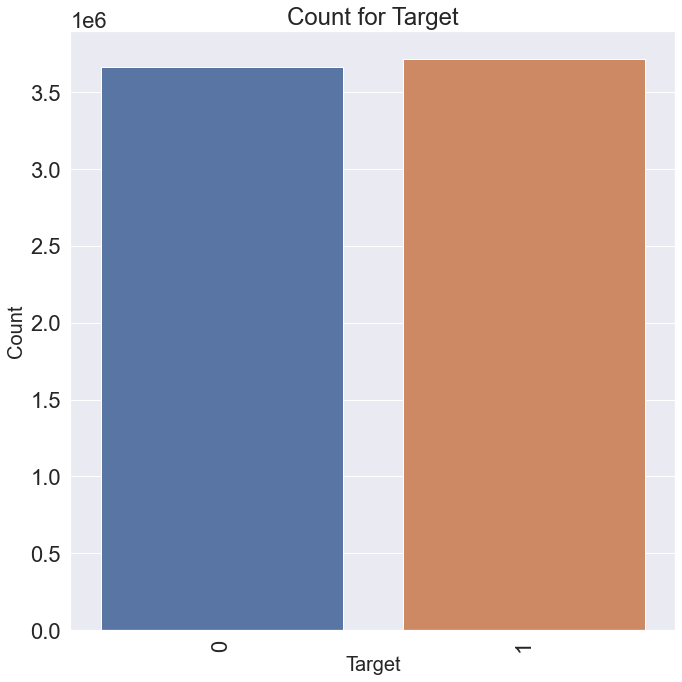

In [15]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="target",data=train_data) 
plt.xlabel("Target",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for Target')
plt.tight_layout()

In [16]:
print('Data for label 1 : {:.6f}%'.format(train_data['target'].value_counts()[0]/train_data.shape[0] * 100))
print('Data for label 0 : {:.6f}%'.format(train_data['target'].value_counts()[1]/train_data.shape[0] * 100))

Data for label 1 : 49.648292%
Data for label 0 : 50.351708%


1. From the above plots we can say that the data is almost balanced.
2. Label-1 data is around 49.64% and label-0 data is around 50.40%

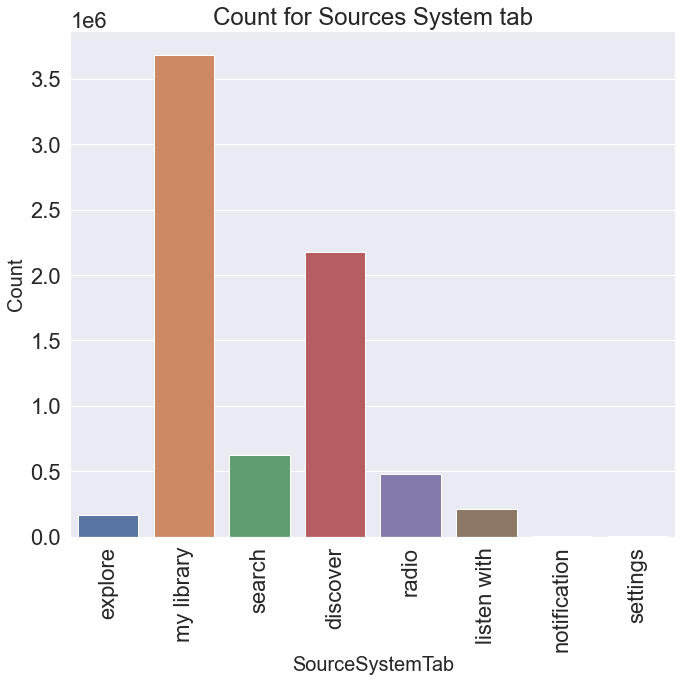

In [17]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="source_system_tab",data=train_data) 
plt.xlabel("SourceSystemTab",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for Sources System tab')
plt.tight_layout()

1. source_system_tab indicates the name of the tab where the event was triggered. 
2. System tabs are used to categorize KKBOX mobile apps functions.
3. It can be depicted from the above plot that people repeat songs from their library or discover tabs.
4. From notifications or settings tab people are not interested to repeat songs

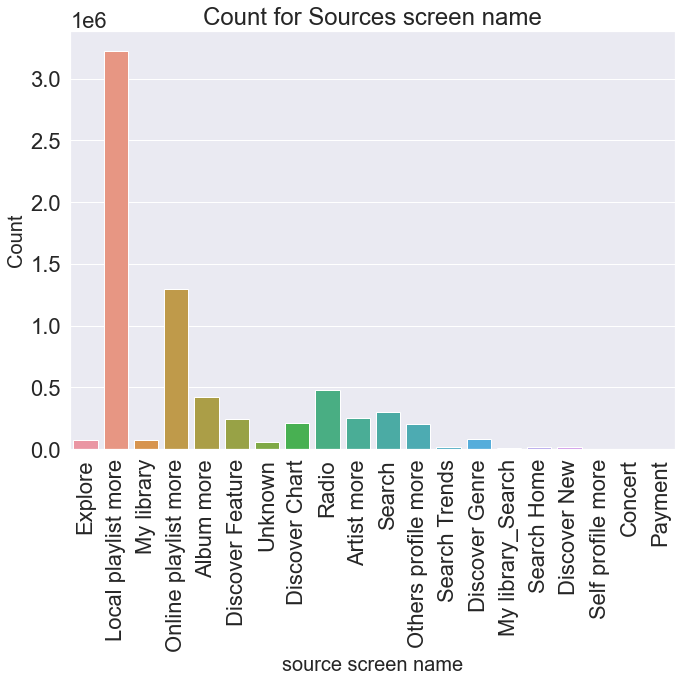

In [18]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="source_screen_name",data=train_data) 
plt.xlabel("source screen name",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for Sources screen name')
plt.tight_layout()

1. source_screen_name is the name of the layout a user sees.
2. Most of the users prefer local_playlist or online_playlist_more as their favourite layouts

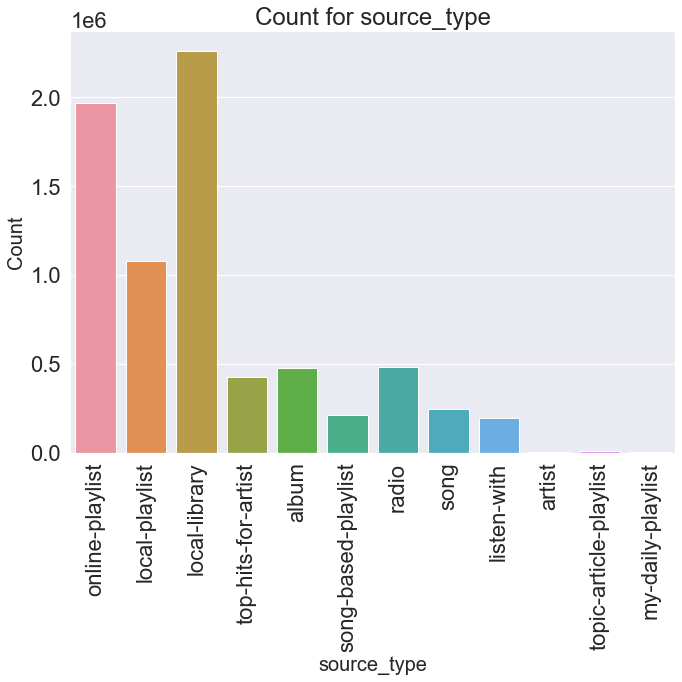

In [19]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="source_type",data=train_data) 
plt.xlabel("source_type",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for source_type')
plt.tight_layout()

1. source_type is the entry point, a user first plays music on mobile apps.
2. From the above plots we can say that, most of the users starts playing songs via their local-library, online-playlist or local-playlist.
3. People don't start listening music with artist or daily-playlist.

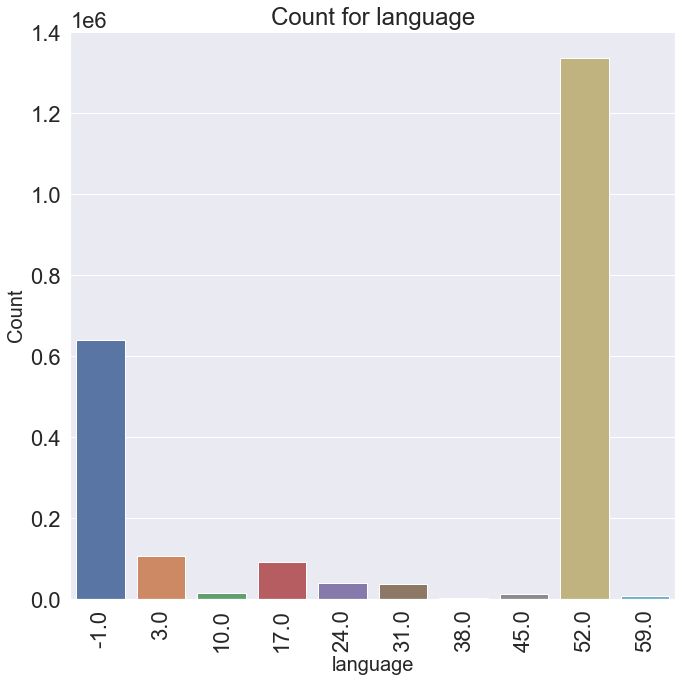

In [20]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="language",data=songs) 
plt.xlabel("language",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for language')
plt.tight_layout()

1. The above plot shows countplot for language.
2. But the language is decoded into numbers
3. Users mostly listen to 52.0 and -1.0.

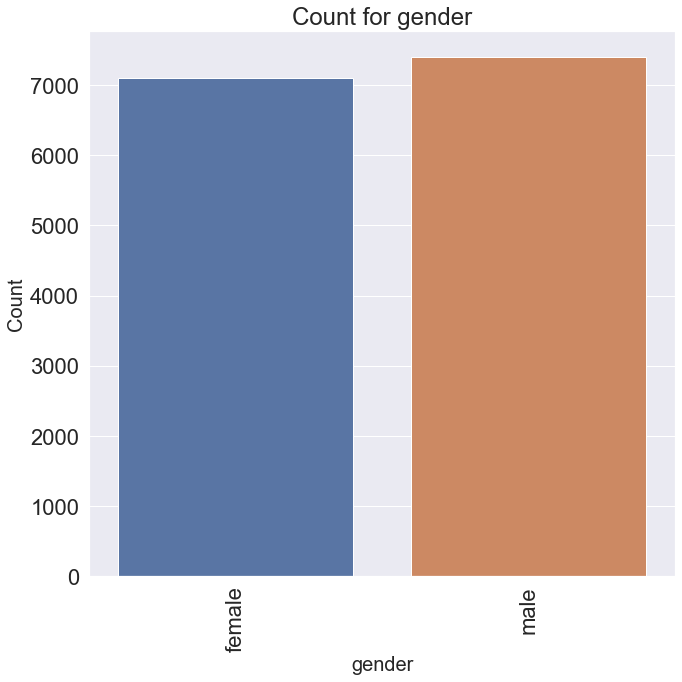

In [21]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="gender",data=members) 
plt.xlabel("gender",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for gender')
plt.tight_layout()

The above plot represents genders listening to the songs:
1. the plot shows both male and female have almost equal count for listening the songs

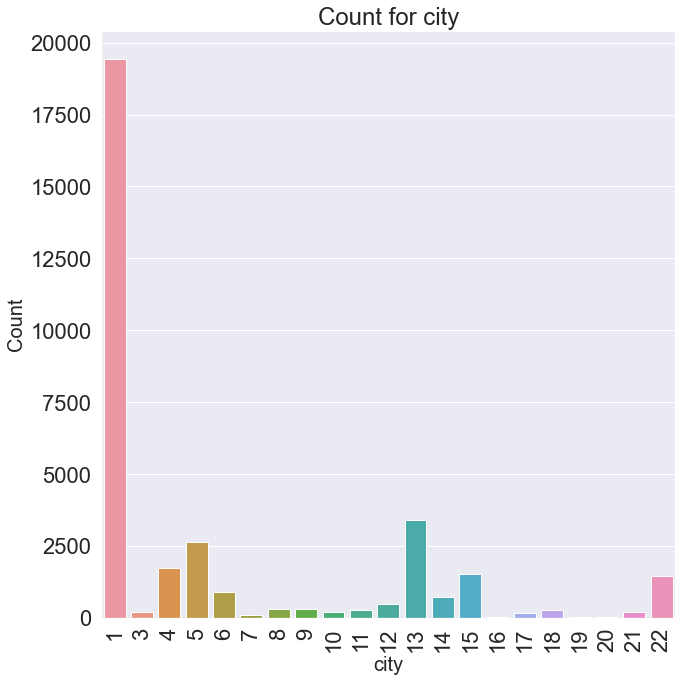

In [22]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="city",data=members) 
plt.xlabel("city",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for city')
plt.tight_layout()

1. Most of the people who used to listen songs are from '1'- labelled city.
2. Some cities have very few people who prefer listening music via this music app

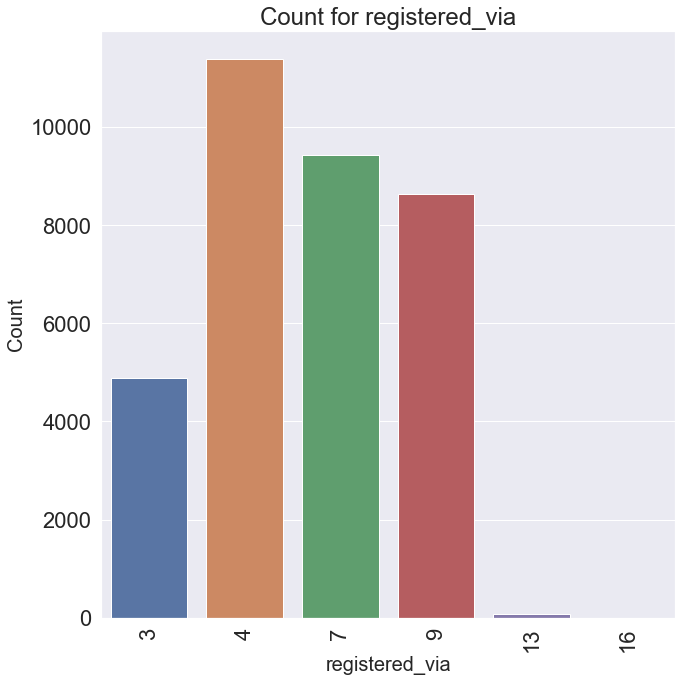

In [23]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="registered_via",data=members) 
plt.xlabel("registered_via",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for registered_via')
plt.tight_layout()

The above plot represents the users registered via :-
1. majority are registered via 4.
2. second majority come from 7 followed by 9
3. 13 and 16 has least registered

# Plot with respect to target variable

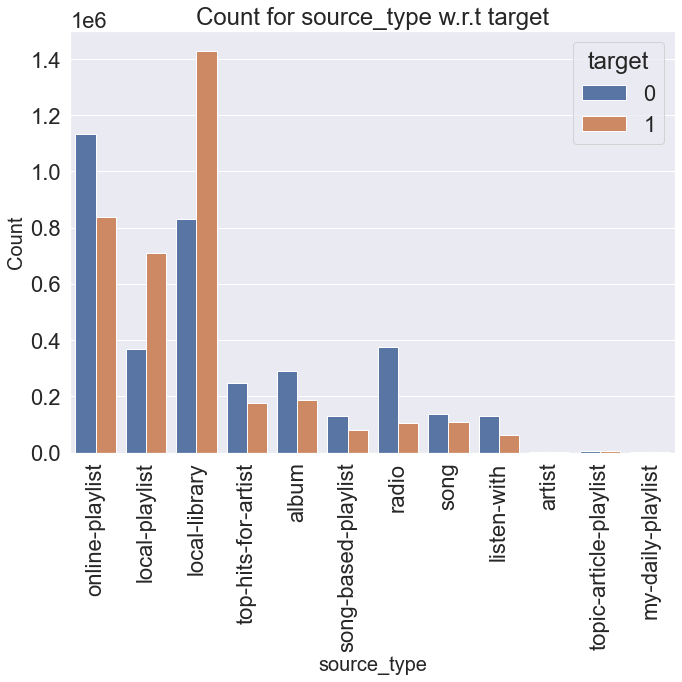

In [24]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="source_type",hue="target",data=train_data) 
plt.xlabel("source_type",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for source_type w.r.t target')
plt.tight_layout()

1. We can see that most of the users tend to repeat songs when it is local library
2. Also Local playlist has most repeating songs 

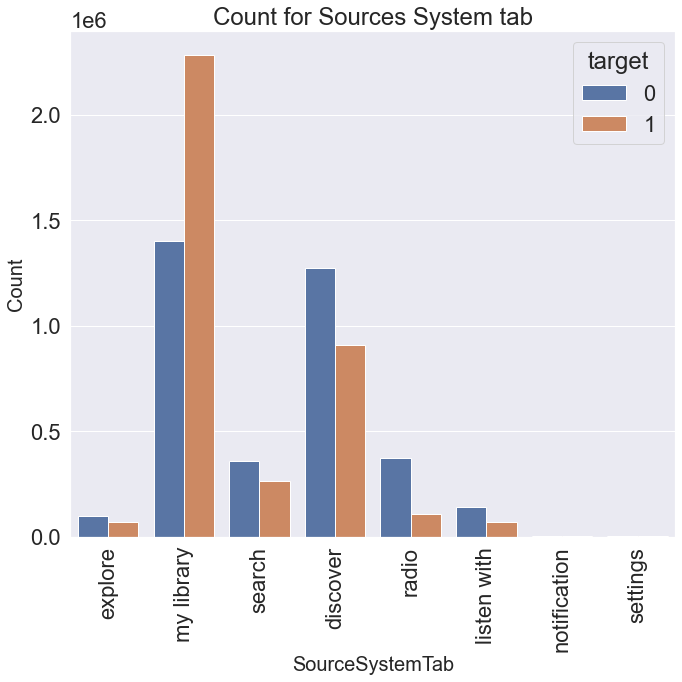

In [25]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="source_system_tab",hue="target",data=train_data) 
plt.xlabel("SourceSystemTab",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for Sources System tab')
plt.tight_layout()

In the Source_sytem_Tab with respect to target variable
1. my library has the highest number for song repeated.

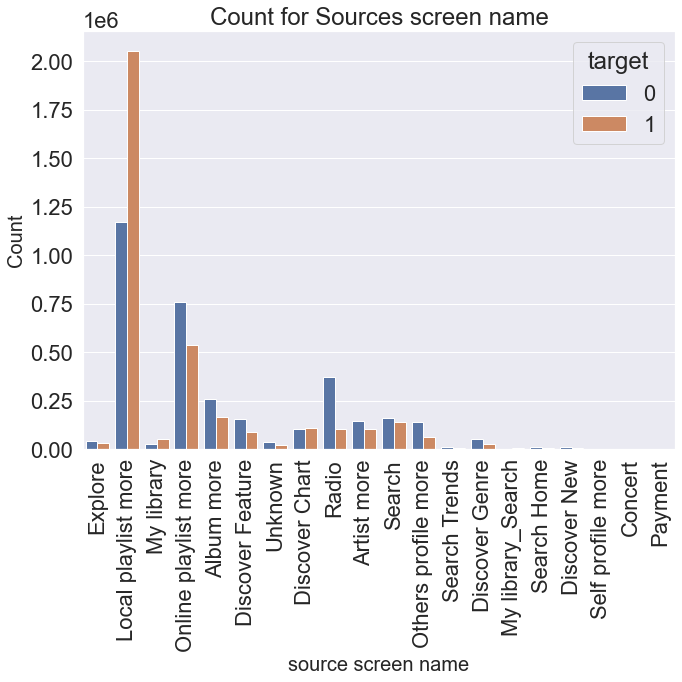

In [26]:
fig = plt.figure(figsize = (10,10))
sns.set(font_scale=2)
ax = sns.countplot(x="source_screen_name",hue="target",data=train_data) 
plt.xlabel("source screen name",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.xticks(rotation='90')
plt.title('Count for Sources screen name')
plt.tight_layout()

In the Source_screen_name with respect to target variable
1. local playlist has the highest number for song repeated.
2. my library has also very few repeated songs

# PDF

Text(0.5, 1.0, 'PDF for Age')

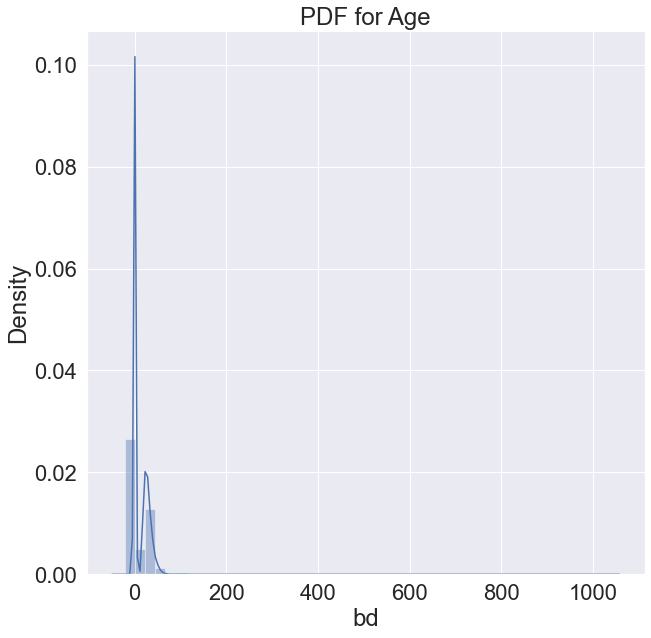

In [27]:
plt.figure(figsize = (10, 10)) 
sns.distplot(members.bd)
sns.set(font_scale=2)
plt.title('PDF for Age')

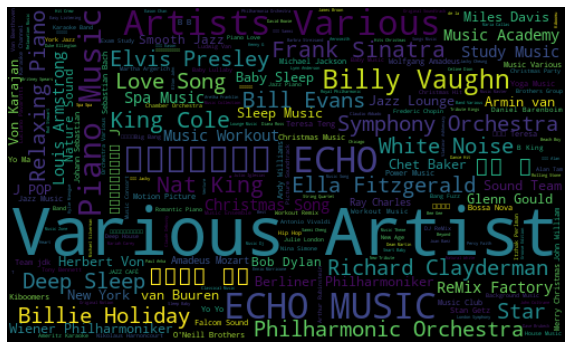

In [28]:
from wordcloud import WordCloud
all_words = ' '.join([text for text in songs['artist_name']])
#print(all_words)
#print(type(all_words))
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


the diagram above is the wordcloud of artist:
1. we can see the various artist label is majority
2. then we have echo music, billie holiday, billy vaughan having most of the search

In [29]:
song_name = song_extra_info.name.replace(np.nan,'None',regex = True)

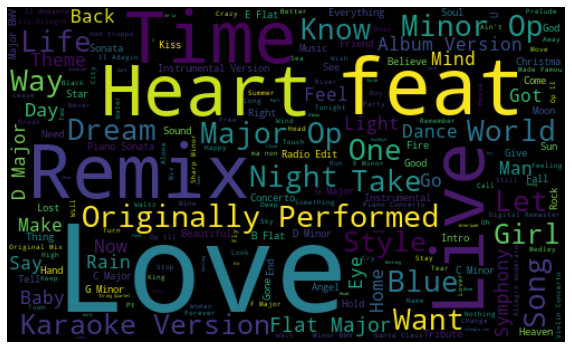

In [30]:
all_words = ' '.join([text for text in song_name])
#print(all_words)
#print(type(all_words))
wordcloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

the diagram above is the wordcloud of song names:
1. Heart, love time remix, feat many more are the key drivers when it comes to search

# Missing values

In [31]:
#reff https://www.kaggle.com/lystdo/beat-kkbox-benchmark-without-using-metadata-0-62
def missing_values(df):
    for col in df.columns:
        nan_count = df[col].isnull().sum()
        total = df.shape[0]
        percentage = nan_count/total * 100
        print(col, 'has {:.2f}% missing values'.format(percentage))

In [32]:
print('Missing values analysis for train data')
missing_values(train_data)

Missing values analysis for train data
msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.34% missing values
source_screen_name has 5.62% missing values
source_type has 0.29% missing values
target has 0.00% missing values


In [33]:
print('Missing values analysis for test data')
missing_values(test_data)

Missing values analysis for test data
id has 0.00% missing values
msno has 0.00% missing values
song_id has 0.00% missing values
source_system_tab has 0.33% missing values
source_screen_name has 6.37% missing values
source_type has 0.29% missing values


In [34]:
print('Missing values analysis for memebrs data')
missing_values(members)

Missing values analysis for memebrs data
msno has 0.00% missing values
city has 0.00% missing values
bd has 0.00% missing values
gender has 57.85% missing values
registered_via has 0.00% missing values
registration_init_time has 0.00% missing values
expiration_date has 0.00% missing values


In [35]:
print('Missing values analysis for songs data')
missing_values(songs)

Missing values analysis for songs data
song_id has 0.00% missing values
song_length has 0.00% missing values
genre_ids has 4.10% missing values
artist_name has 0.00% missing values
composer has 46.66% missing values
lyricist has 84.71% missing values
language has 0.00% missing values


In [36]:
print('Missing values analysis for songs_extra_info data')
missing_values(song_extra_info)

Missing values analysis for songs_extra_info data
song_id has 0.00% missing values
name has 0.00% missing values
isrc has 5.95% missing values


<AxesSubplot:>

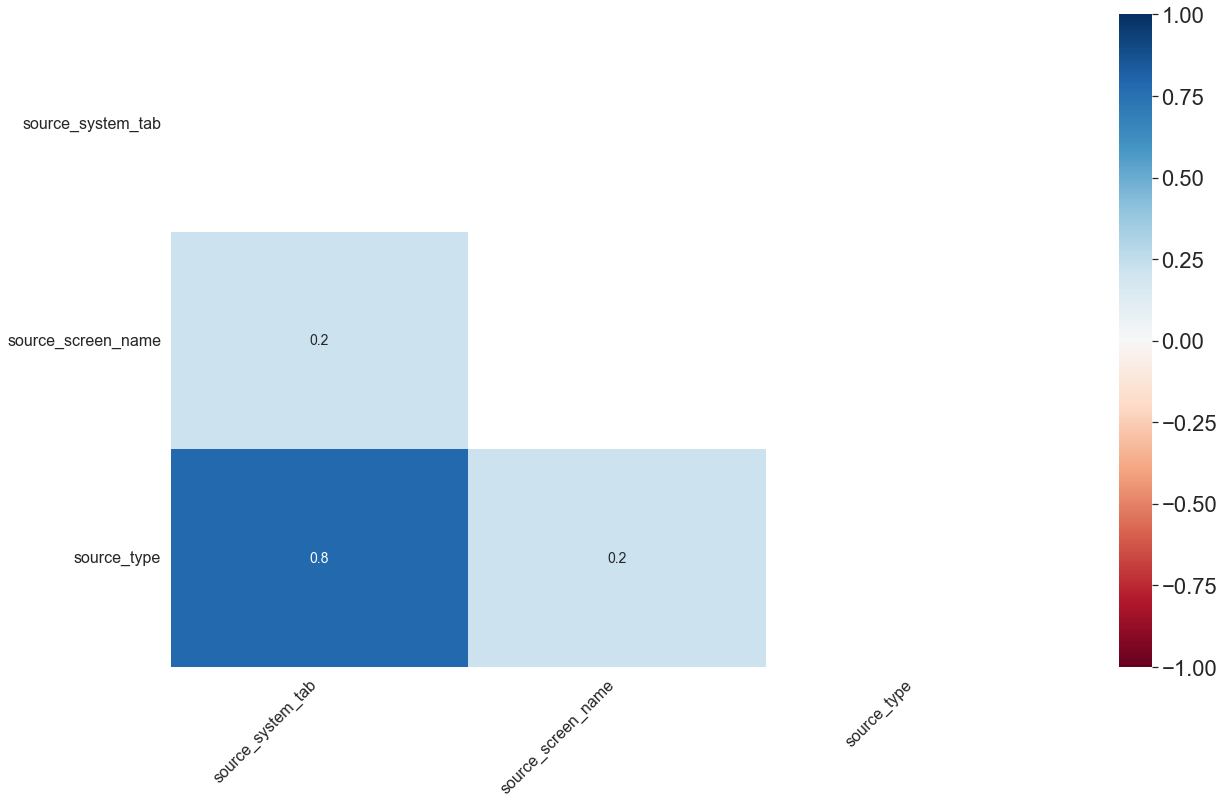

In [37]:
msno.heatmap(train_data)

1. From the above heatmap we can say that no missing values in msno, song_id or target.
2. source_type and source_system_tab are having positive strongly corelation.
3. In simple lanugauge from the point, where user starts to play the songs and over some tabs it repats the song.

# Merging And Splitting Data

In [15]:
tr_index = train_data.shape[0] * 8 // 10

In [16]:
tr_data = train_data.iloc[:tr_index]
val_data = train_data.iloc[tr_index:]
print(train_data.shape, val_data.shape)

(7377418, 6) (1475484, 6)


In [17]:
train_members = pd.merge(tr_data, members, on='msno', how='left')
val_members = pd.merge(val_data, members, on='msno', how='left')
test_members = pd.merge(test_data, members, on='msno', how='left')

In [18]:
songs_all = pd.merge(songs, song_extra_info, on='song_id', how='left')

In [19]:
X_train = pd.merge(train_members, songs_all, on='song_id', how='left')
X_cv = pd.merge(val_members, songs_all, on='song_id', how='left')
X_test = pd.merge(test_members, songs_all, on='song_id', how='left')

In [20]:
X_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,song_length,genre_ids,artist_name,composer,lyricist,language,name,isrc
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,206471.0,359,Bastille,Dan Smith| Mark Crew,NaN,52.0,Good Grief,GBUM71602854
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,284584.0,1259,Various Artists,NaN,NaN,52.0,Lords of Cardboard,US3C69910183
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,225396.0,1259,Nas,N. Jones、W. Adams、J. Lordan、D. Ingle,NaN,52.0,Hip Hop Is Dead(Album Version (Edited)),USUM70618761
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24,female,9,20110525,20170911,255512.0,1019,Soundway,Kwadwo Donkoh,NaN,-1.0,Disco Africa,GBUQH1000063
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0,NaN,7,20120102,20171005,187802.0,1011,Brett Young,Brett Young| Kelly Archer| Justin Ebach,NaN,52.0,Sleep Without You,QM3E21606003


<AxesSubplot:>

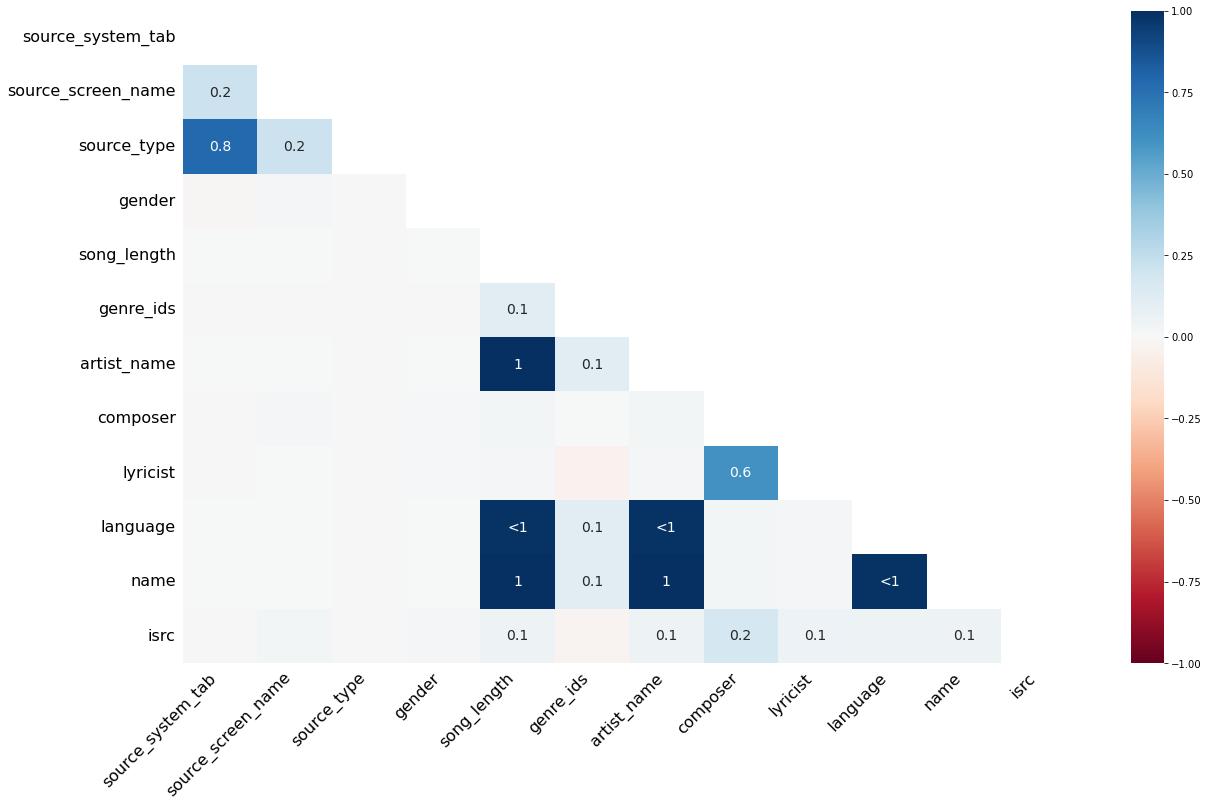

In [18]:
msno.heatmap(X_train)

1. From the above heatmap we can say that, song length is depends on artist and the language in which it is made.
2. lyrist and composer are also corelated, like some composers have their biases on lyrist and vice versa.
3. song_length is also correlated with artist, composer, lyrist, genre_id, language, name, song_year, isrc

F.E. reff from the kaggle kernel https://www.kaggle.com/asmitavikas/feature-engineered-0-68310

# Feature Engineering

# FE  for songs

In [21]:
X_train.isnull().sum()

msno                            0
song_id                         0
source_system_tab           20018
source_screen_name         322244
source_type                 16775
target                          0
city                            0
bd                              0
gender                    2346748
registered_via                  0
registration_init_time          0
expiration_date                 0
song_length                    98
genre_ids                   91956
artist_name                    98
composer                  1335949
lyricist                  2528786
language                      126
name                         1023
isrc                       460218
dtype: int64

We have seen that songs has 'lyricist' and 'composer' features which have more than 25% of missing values. So let's just ignore these two features for now and fill missing values in the remaining features

In [22]:
# Filling missing values
def filling_missing_values(data):
    data['source_system_tab'].fillna('no_system_tab', inplace=True)
    data['source_screen_name'].fillna('no_screen_name', inplace=True)
    data['source_type'].fillna('np_source_type', inplace=True)
    data['bd'].fillna(0, inplace=True)
    data['gender'].fillna('gender_missing', inplace=True)
    data['song_length'].fillna(0, inplace=True)
    data['genre_ids'].fillna(0, inplace=True)
    data['lyricist'].fillna('no_lyricist', inplace=True)
    data['artist_name'].fillna('no_artist_name', inplace=True)
    data['composer'].fillna('no_composer', inplace=True)
    data['language'].fillna('no_language', inplace=True)
    data['name'].fillna('no_name', inplace=True)
    return data

X_train = filling_missing_values(X_train)
X_cv = filling_missing_values(X_cv)
X_test = filling_missing_values(X_test)

# FE for members

1. Members has registration and expiration dates, from which we can extract features like membership time, individual day, month and year.
2. From analysis of 'bd' feature we noticed some outliers, which we can be remove.

In [23]:
# source: https://www.kaggle.com/asmitavikas/feature-engineered-0-68310
def extract_date_fatures(data):
    '''Function to extract features like day, month, year from dates.'''
    # convert into date format
    data['expiration_date'] = pd.to_datetime(data['expiration_date'], format='%Y%m%d')
    data['registration_init_time'] = pd.to_datetime(data['registration_init_time'], format='%Y%m%d')
  
    # get membership period from registration and expiration dates
    data['membership_days'] = data['expiration_date'].subtract(data['registration_init_time']).dt.days.astype(int)

    # extract year, month and day from dates
    data['registration_year'] = data['registration_init_time'].dt.year
    data['registration_month'] = data['registration_init_time'].dt.month
    data['registration_day'] = data['registration_init_time'].dt.day

    data['expiration_year'] = data['expiration_date'].dt.year
    data['expiration_month'] = data['expiration_date'].dt.month
    data['expiration_day'] = data['expiration_date'].dt.day

    return data

X_train = extract_date_fatures(X_train)
X_cv = extract_date_fatures(X_cv)
X_test = extract_date_fatures(X_test)

In [24]:
def filter_age(x):
    # 98th percentile is 47
    '''Function to fix age value between 0 to 75'''
    if x >= 0 and x <= 75:
        return x
    else:
        return np.nan
    

X_train['bd'] = X_train['bd'].apply(filter_age)
X_cv['bd'] = X_train['bd'].apply(filter_age)
X_test['bd'] = X_train['bd'].apply(filter_age)

# F.E for genre

1. genre_ids have more than one values which are seperated by '|'.
2. We can extract features from genre_ids like total_count of genres.
3. We can also seperate genre_ids in-to individual columns.
4. we will consider more than 2 genre_ids_count.

In [25]:
# reff : https://github.com/lystdo/Codes-for-WSDM-CUP-Music-Rec-1st-place-solution/blob/master/input/training/script/id_process.py
def generate_genre_ids(data):
    '''Function to sepearate each genre_id and count total number of genre_ids'''
    genre_ids_matrix = np.zeros((data.shape[0], 4))

    for i in range(data.shape[0]):
        ids = str(data['genre_ids'].values[i]).split('|')
        if len(ids) > 2:
            genre_ids_matrix[i, 0] = (ids[0])
            genre_ids_matrix[i, 1] = (ids[1])
            genre_ids_matrix[i, 2] = (ids[2])
        elif len(ids) > 1:
            genre_ids_matrix[i, 0] = (ids[0])
            genre_ids_matrix[i, 1] = (ids[1])
        elif len(ids) == 1:
            genre_ids_matrix[i, 0] = (ids[0])
        genre_ids_matrix[i, 3] = len(ids)

    data['first_genre_id'] = genre_ids_matrix[:, 0] # keeps first genre_id
    data['second_genre_id'] = genre_ids_matrix[:, 1] # keeps second genre_id
    data['third_genre_id'] = genre_ids_matrix[:, 2] # keeps third genre_id
    data['genre_ids_count'] = genre_ids_matrix[:, 3] # keeps count of genre_ids
    return data

In [26]:
X_train = generate_genre_ids(X_train)
X_cv = generate_genre_ids(X_cv)
X_test = generate_genre_ids(X_test)

# F.E for Artist

1. songs has 'feat' included in their artist names. We will add another column with boolean value based on 'feat' presents or not.
2. If more than one artists are present in the song then their names are seperated by & and ,
3. We will add extra features like is_featured, artist_count, first_artist_name.

In [27]:
def calculate_is_featured(data):
    '''Function to check 'feat' in artist column.'''
    data['is_featured'] = data['artist_name'].apply(lambda x: 1 if ' feat' in str(x) else 0).astype(np.int8)
    return data

In [28]:
X_train = calculate_is_featured(X_train)
X_cv = calculate_is_featured(X_cv)
X_test= calculate_is_featured(X_test)

In [29]:
#reff : https://github.com/lystdo/Codes-for-WSDM-CUP-Music-Rec-1st-place-solution/blob/master/input/training/script/id_process.py
def artist_count(x):
    '''Function to count total number of artists for each song'''
    return x.count('and') + x.count(',') + x.count(' feat') + x.count('&') + 1

def get_first_artist(x):
    '''Function to extract first artist name from more than one artists'''
    if x.count('and') > 0:
        x = x.split('and')[0]
    if x.count(',') > 0:
        x = x.split(',')[0]
    if x.count(' feat') > 0:
        x = x.split(' feat')[0]
    if x.count('&') > 0:
        x = x.split('&')[0]
    return x.strip()

In [30]:
def calculate_artist_features(data):
    '''Function to execute above both functions'''
    # get artist count 
    data['artist_count'] = data['artist_name'].apply(artist_count).astype(np.int8)
    # get first artist name
    data['first_artist_name'] = data['artist_name'].apply(get_first_artist)
    return data

In [31]:
X_train = calculate_artist_features(X_train)
X_cv = calculate_artist_features(X_cv)
X_test = calculate_artist_features(X_test)

# FE for Lyricist

In [32]:
X_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,expiration_year,expiration_month,expiration_day,first_genre_id,second_genre_id,third_genre_id,genre_ids_count,is_featured,artist_count,first_artist_name
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1,1,0.0,gender_missing,7,...,2017,10,5,359.0,0.0,0.0,1.0,0,1,Bastille
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,...,2017,9,11,1259.0,0.0,0.0,1.0,0,1,Various Artists
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,...,2017,9,11,1259.0,0.0,0.0,1.0,0,1,Nas
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1,13,24.0,female,9,...,2017,9,11,1019.0,0.0,0.0,1.0,0,1,Soundway
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1,1,0.0,gender_missing,7,...,2017,10,5,1011.0,0.0,0.0,1.0,0,1,Brett Young


In [33]:
def lyricist_count(x):
    '''Function to count lyricists'''
    if x == 'no_lyricist':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1
    return sum(map(x.count, ['|', '/', '\\', ';']))

def get_first_lyricist(x):
    '''Function to get lyricist first name'''
    try:
        if x.count('|') > 0:
            x = x.split('|')[0]
        if x.count('/') > 0:
            x = x.split('/')[0]
        if x.count('\\') > 0:
            x = x.split('\\')[0]
        if x.count(';') > 0:
            x = x.split(';')[0]
        return x.strip()
    except:
        return x
    
def calculate_lyricist_features(data):
    '''Function to extract features for lyricist'''
    data['lyricist_count'] = data['lyricist'].apply(lyricist_count).astype(np.int8)
    data['first_lyricist'] = data['lyricist'].apply(get_first_lyricist)
    return data

X_train = calculate_lyricist_features(X_train)
X_cv = calculate_lyricist_features(X_cv)
X_test = calculate_lyricist_features(X_test)

In [34]:
def composer_count(x):
    '''Function to get composer count'''
    if x == 'no_composer':
        return 0
    else:
        return sum(map(x.count, ['|', '/', '\\', ';'])) + 1

def get_first_composer(x):
    '''Function to get first composer name'''
    try:
        if x.count('|') > 0:
            x = x.split('|')[0]
        if x.count('/') > 0:
            x = x.split('/')[0]
        if x.count('\\') > 0:
            x = x.split('\\')[0]
        if x.count(';') > 0:
            x = x.split(';')[0]
        return x.strip()
    except:
        return x
    
def calculate_composer_features(data):
    '''Function to extrract composer features'''
    data['composer_count'] = data['composer'].apply(composer_count).astype(np.int8)
    data['first_composer'] = data['composer'].apply(get_first_composer)
    return data

X_train = calculate_composer_features(X_train)
X_cv = calculate_composer_features(X_cv)
X_test = calculate_composer_features(X_test)

# F.E. for Song_Extra_info

1. We will add boolean feature for songs, if song comes from '17' or '45' lanuage then we will set boolean feature.
2. We will calculate mean length of song from train songs and will set the song's size as an extra boolean feature either smaller than mean or not.
3. songs_extra file has feature like 'isrc' which is International Standard Recording Code. For each song its isrc is unique which contains information like countr_code, registraion_code, year of reference and designation code.
https://isrc.ifpi.org/en/isrc-standard/code-syntax
4. We can extract features like country_code, registration_code and song_year from 'isrc' feature

In [35]:
def song_lang_boolean(x):
    '''Function to add language boolean feature'''
    if 17.0 == str(x) or 45.0 == str(x):
        return 1
    else:
        return 0
    
mean_song_length = np.mean(X_train['song_length'])
def smaller_song(x):
    '''Function to add song_size boolean feature'''
    if x < mean_song_length:
        return 1
    else:
        return 0

In [36]:
def calculate_language_features(data):
    data['song_lang_boolean'] = data['language'].apply(song_lang_boolean).astype(np.int8)
    data['song_size_boolean'] = data['song_length'].apply(smaller_song).astype(np.int8)
    return data

In [37]:
X_train = calculate_language_features(X_train)
X_cv = calculate_language_features(X_cv)
X_test = calculate_language_features(X_test)

In [38]:
# source : https://www.kaggle.com/asmitavikas/feature-engineered-0-68310
def calcualte_songs_features(data):
    '''Function to extract features from isrc.'''
    isrc = data['isrc']
    data['country_code'] = isrc.str.slice(0, 2)
    data['registration_code'] = isrc.str.slice(2, 5)
    data['song_year'] = isrc.str.slice(5, 7).astype(float)
    data['song_year'] = data['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)
    data['isrc_missing'] = (data['country_code'] == 0) * 1.0
    return data

In [39]:
X_train = calcualte_songs_features(X_train)
X_cv = calcualte_songs_features(X_cv)
X_test = calcualte_songs_features(X_test)

In [40]:
def filling_missing_isrc_values(data):
    '''Function to fill missing isrc values'''
    data['isrc'].fillna('no_isrc', inplace=True)
    data['country_code'].fillna('no_country_code', inplace=True)
    data['registration_code'].fillna('no_registration_code', inplace=True)
    data['song_year'].fillna('no_song_year', inplace=True)
    return data

X_train = filling_missing_isrc_values(X_train)
X_cv = filling_missing_isrc_values(X_cv)
X_test = filling_missing_isrc_values(X_test)

In [41]:
X_train = X_train.drop(['genre_ids', 'artist_name', 'composer', 'lyricist','isrc', 'registration_init_time', 'expiration_date'], axis=1)
X_cv = X_cv.drop(['genre_ids', 'artist_name' , 'composer', 'lyricist', 'isrc', 'registration_init_time', 'expiration_date'], axis=1)
X_test = X_test.drop(['genre_ids', 'artist_name' , 'composer', 'lyricist', 'isrc', 'registration_init_time', 'expiration_date'], axis=1)

In [44]:
def groupby(data):
    member_song_count = data.groupby('msno').count()['song_id'].to_dict()
    data['member_song_count'] = data['msno'].apply(lambda x: member_song_count[x])

    artist_song_count = data.groupby('first_artist_name').count()['song_id'].to_dict()
    data['artist_song_count'] = data['first_artist_name'].apply(lambda x: artist_song_count[x])

    composer_song_count = data.groupby('first_composer').count()['song_id'].to_dict()
    data['composer_song_count'] = data['first_composer'].apply(lambda x: composer_song_count[x])

    lyricist_song_count = data.groupby('first_lyricist').count()['song_id'].to_dict()
    data['lyricist_song_count'] = data['first_lyricist'].apply(lambda x: lyricist_song_count[x])

    first_genre_id_song_count = data.groupby('first_genre_id').count()['song_id'].to_dict()
    data['genre_song_count'] = data['first_genre_id'].apply(lambda x: first_genre_id_song_count[x])

    lang_song_count = data.groupby('language').count()['song_id'].to_dict()
    data['lang_song_count'] = data['language'].apply(lambda x: lang_song_count[x])

    song_member_count = data.groupby('song_id').count()['msno'].to_dict()
    data['song_member_count'] = data['song_id'].apply(lambda x: song_member_count[x])
 
    return data

In [45]:
X_train = groupby(X_train)
X_cv = groupby(X_cv)
X_test = groupby(X_test)

In [46]:
#X_train.to_csv('train_fe.csv', index=False)
#X_cv.to_csv('val_fe.csv', index=False)
#X_test.to_csv('test_fe.csv', index=False)

In [14]:
X_train_fe = pd.read_csv('train_fe.csv')
X_val_fe = pd.read_csv('val_fe.csv')
X_test_fe = pd.read_csv('test_fe.csv')

In [15]:
print(X_train_fe.shape)
print(X_test_fe.shape)
print(X_val_fe.shape)


(5901934, 44)
(2556790, 44)
(1475484, 44)


In [16]:
X_train_fe.isnull().any()

msno                   False
song_id                False
source_system_tab      False
source_screen_name     False
source_type            False
target                 False
city                   False
bd                      True
gender                 False
registered_via         False
song_length            False
language               False
name                   False
membership_days        False
registration_year      False
registration_month     False
registration_day       False
expiration_year        False
expiration_month       False
expiration_day         False
first_genre_id         False
second_genre_id        False
third_genre_id         False
genre_ids_count        False
is_featured            False
artist_count           False
first_artist_name       True
lyricist_count         False
first_lyricist          True
composer_count         False
first_composer          True
song_lang_boolean      False
song_size_boolean      False
country_code           False
registration_c

In [17]:
X_train_fe.drop(['first_lyricist', 'first_composer'], axis=1, inplace=True)
X_val_fe.drop(['first_lyricist', 'first_composer'], axis=1, inplace=True)
X_test_fe.drop(['first_lyricist', 'first_composer'], axis=1, inplace=True)

# Preprocessing:

1. We will use standardization to scale numeric features
2. We will use label encoding to convert categorical features.
3. There are some values for features which are present in train data points but not in val and test data points

In [18]:
a=X_train_fe['bd'].mean()

In [19]:
def missing(data):
    '''Function to fill missing values'''
    data['first_artist_name'].fillna('no_artist_name', inplace=True)
    data['bd'].fillna(a, inplace=True)
    return data

X_train_fe = missing(X_train_fe)
X_val_fe = missing(X_val_fe)
X_test_fe = missing(X_test_fe)

In [20]:
X_train_fe['language'] = X_train_fe['language'].apply(lambda x: str(x))
X_val_fe['language'] = X_val_fe['language'].apply(lambda x: str(x))
X_test_fe['language'] = X_test_fe['language'].apply(lambda x: str(x))

# Standardization

In [21]:
X_train_fe.shape

(5901934, 42)

In [22]:
X_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901934 entries, 0 to 5901933
Data columns (total 42 columns):
 #   Column               Dtype  
---  ------               -----  
 0   msno                 object 
 1   song_id              object 
 2   source_system_tab    object 
 3   source_screen_name   object 
 4   source_type          object 
 5   target               int64  
 6   city                 int64  
 7   bd                   float64
 8   gender               object 
 9   registered_via       int64  
 10  song_length          float64
 11  language             object 
 12  name                 object 
 13  membership_days      int64  
 14  registration_year    int64  
 15  registration_month   int64  
 16  registration_day     int64  
 17  expiration_year      int64  
 18  expiration_month     int64  
 19  expiration_day       int64  
 20  first_genre_id       float64
 21  second_genre_id      float64
 22  third_genre_id       float64
 23  genre_ids_count      float64
 24

Standardization will transform numeric values such that mean = 0 and std_dev = 1.

In [23]:
numeric_features = ['bd','registered_via', 'song_length', 'membership_days','genre_ids_count', 'artist_count','is_featured','lyricist_count','song_lang_boolean',
                    'composer_count','song_size_boolean','isrc_missing']

In [24]:
pd.set_option('mode.chained_assignment', None)
for i in numeric_features:
    scaler = StandardScaler()
    X_train_fe[i] = scaler.fit_transform(X_train_fe[i].values.reshape(-1,1))
    X_val_fe[i] = scaler.transform(X_val_fe[i].values.reshape(-1,1))
    X_test_fe[i] = scaler.transform(X_test_fe[i].values.reshape(-1,1))

In [25]:
cat_features = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'city', 'gender',\
                'registered_via', 'name', 'registration_year', 'registration_month', 'registration_day',\
                'expiration_year', 'expiration_month', 'expiration_day', 'first_genre_id', 'second_genre_id',\
                'third_genre_id', 'first_artist_name', 'country_code',
                'registration_code','song_year', 'language']

In [26]:
for i in cat_features:
    enc = LabelEncoder()
    print(i)
    combined = X_train_fe[i].append(X_val_fe[i])
    combined = set(combined.append(X_test_fe[i]))
    combined = np.array(list(combined))
    enc = enc.fit(combined)
    X_train_fe[i] = enc.transform(X_train_fe[i].values.reshape(-1,1))
    X_val_fe[i] = enc.transform(X_val_fe[i].values.reshape(-1,1))
    X_test_fe[i] = enc.transform(X_test_fe[i].values.reshape(-1,1))

msno
song_id
source_system_tab
source_screen_name
source_type
city
gender
registered_via
name
registration_year
registration_month
registration_day
expiration_year
expiration_month
expiration_day
first_genre_id
second_genre_id
third_genre_id
first_artist_name
country_code
registration_code
song_year
language


In [27]:
#X_train_fe.to_csv('tr_data.csv', index=False)
#X_val_fe.to_csv('val_data.csv', index=False)

In [28]:
X_train_fe.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,registration_code,song_year,isrc_missing,member_song_count,artist_song_count,composer_song_count,lyricist_song_count,genre_song_count,lang_song_count,song_member_count
0,9176,86884,1,7,7,1,0,-1.116405,1,2,...,6234,98,0.0,4313,904,531,2528786,84724,1498090,196
1,19273,260594,3,8,4,1,11,0.430583,0,3,...,485,81,0.0,581,237384,1335949,2528786,145425,1498090,1
2,19273,140755,3,8,4,1,11,0.430583,0,3,...,6234,88,0.0,581,222,3,2528786,145425,1498090,3
3,19273,27577,3,8,4,1,11,0.430583,0,3,...,6245,92,0.0,581,1,1,2528786,27,243239,1
4,9176,38706,1,7,7,1,0,-1.116405,1,2,...,493,98,0.0,4313,342,342,2528786,27526,1498090,332


# Data Processing and Modelling

In [29]:
X_train_f = X_train_fe.drop(['target'], axis=1)
y_train = X_train_fe['target']

X_val_f = X_val_fe.drop(['target'], axis=1)
y_cv = X_val_fe['target']

X_test_f = X_test_fe.drop(['id'], axis=1)

In [30]:
tr_data = X_train_f[:150000]
val_data = X_val_f[:70000]
test_data = X_test_f[:80000]
y_train = y_train[:150000]
y_cv = y_cv[:70000]

print('Data size for train data is : ', tr_data.shape, ' and validation data is : ', val_data.shape)

Data size for train data is :  (150000, 41)  and validation data is :  (70000, 41)


# Logistic Regression (Baseline Model)

1. We will use SGDclassifier with log loss as it uses SGD.
2. We will use GridSearchCV for hyper-parameter tuning.

In [63]:
# Hyper parameter tuning using GridearchCV for LR
parameters = {'penalty':['l2', 'l1'], 'alpha':[10 ** x for x in range(-4, 2)]}
clf = SGDClassifier(loss='log', n_jobs=-1, random_state=23, class_weight='balanced' )
model = GridSearchCV(clf, parameters, scoring = 'roc_auc', n_jobs=-1, verbose=2, cv=3)
model.fit(tr_data, y_train)
print(model.best_estimator_)
print('train AUC = ',model.score(tr_data, y_train))
print('val AUC = ',model.score(val_data, y_cv))
print('Done!')

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SGDClassifier(alpha=0.001, class_weight='balanced', loss='log', n_jobs=-1,
              penalty='l1', random_state=23)
train AUC =  0.6061046728938522
val AUC =  0.5591843309994615
Done!


In [67]:
lr = SGDClassifier(alpha=0.001, class_weight='balanced',loss='log', max_iter=1000,n_jobs=-1, penalty='l1',
              random_state=23)
lr.fit(tr_data, y_train)

SGDClassifier(alpha=0.001, class_weight='balanced', loss='log', n_jobs=-1,
              penalty='l1', random_state=23)

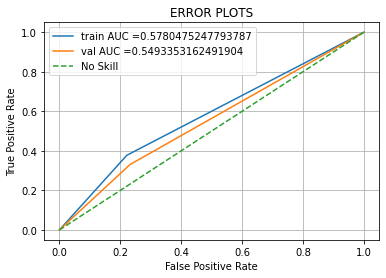

In [68]:
ns_probs = [0 for _ in range(len(y_cv))]
ns_auc = roc_auc_score(y_cv, ns_probs)
y_train_pred1 = lr.predict_proba(tr_data) [:,1]
y_test_pred1 = lr.predict_proba(val_data) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_cv, ns_probs)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_test_pred1)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="val AUC ="+str(auc(test_fpr, test_tpr)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<AxesSubplot:>

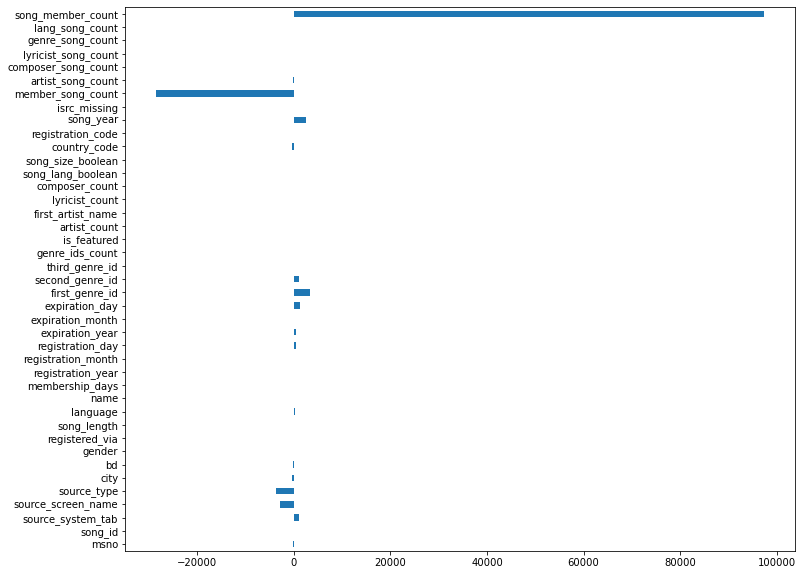

In [69]:
feat_importances = pd.Series(lr.coef_[0], index=tr_data.columns)
feat_importances.plot(kind='barh',figsize=(12, 10))

1. We can see from the above plot that, features like source type , member_song_count etc have negative feature importance
2. song_member_count has highest importance

# SVM

In [70]:
parameters = {'penalty':['l2', 'l1'], 'alpha':[10 ** x for x in range(-4, 2)]}
clf = SGDClassifier(loss='hinge', n_jobs=-1, random_state=23, class_weight='balanced' )
model = GridSearchCV(clf, parameters, scoring = 'roc_auc', n_jobs=-1, verbose=2, cv=3)
model.fit(tr_data, y_train)

print(model.best_estimator_)
print('train AUC = ',model.score(tr_data, y_train))
print('val AUC = ',model.score(val_data, y_cv))

Fitting 3 folds for each of 12 candidates, totalling 36 fits
SGDClassifier(alpha=0.001, class_weight='balanced', n_jobs=-1, penalty='l1',
              random_state=23)
train AUC =  0.5939252578274603
val AUC =  0.5558330061635022


In [71]:
svm = SGDClassifier(alpha=0.001,class_weight='balanced',n_jobs=-1, penalty='l1',random_state=23)
svm.fit(tr_data, y_train)
calibrator = CalibratedClassifierCV(svm, cv='prefit')
prob=calibrator.fit(tr_data, y_train)

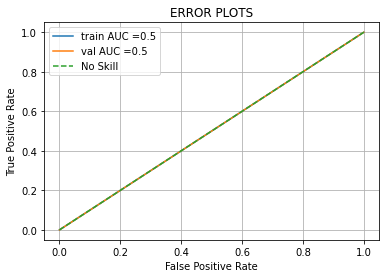

In [72]:
ns_probs = [0 for _ in range(len(y_cv))]
ns_auc = roc_auc_score(y_cv, ns_probs)
y_train_pred1 = prob.predict_proba(tr_data) [:,1]
y_test_pred1 = prob.predict_proba(val_data) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_cv, ns_probs)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_test_pred1)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="val AUC ="+str(auc(test_fpr, test_tpr)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<AxesSubplot:>

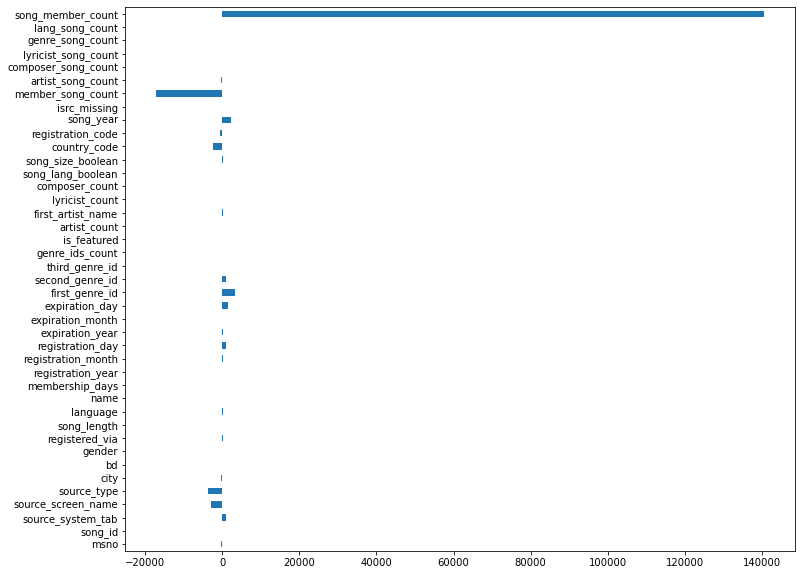

In [73]:
feat_importances = pd.Series(svm.coef_[0], index=tr_data.columns)
feat_importances.plot(kind='barh',figsize=(12, 10))

1. just like LR we also have negative features when we use SVM, we hav use Hingeloss with SGD and caliibrated the model
2. song member count code has highest importance

# Random Forest

In [18]:
start = time.time()
parameters = {'n_estimators':[100, 200, 300, 500,1000]}
clf = RandomForestClassifier(random_state=23, class_weight='balanced', n_jobs=-1)
model = GridSearchCV(clf, parameters, scoring = 'roc_auc', verbose=2, cv=3)
model.fit(tr_data, y_train)

print(model.best_estimator_)
print('train AUC = ',model.score(tr_data, y_train))
print('val AUC = ',model.score(val_data, y_cv))
print('Time taken for hyper parameter tuning is : ', (time.time() -  start))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] END ...................................n_estimators=100; total time=   7.1s
[CV] END ...................................n_estimators=100; total time=   4.9s
[CV] END ...................................n_estimators=100; total time=   4.6s
[CV] END ...................................n_estimators=200; total time=   9.1s
[CV] END ...................................n_estimators=200; total time=   9.5s
[CV] END ...................................n_estimators=200; total time=   9.1s
[CV] END ...................................n_estimators=300; total time=  14.5s
[CV] END ...................................n_estimators=300; total time=  14.1s
[CV] END ...................................n_estimators=300; total time=  13.8s
[CV] END ...................................n_estimators=500; total time=  22.9s
[CV] END ...................................n_estimators=500; total time=  23.9s
[CV] END ...................................n_est

In [20]:
rf = RandomForestClassifier(class_weight='balanced',n_estimators=1000,n_jobs=-1,random_state=23,warm_start=False)
rf.fit(tr_data, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=1000, n_jobs=-1,
                       random_state=23)

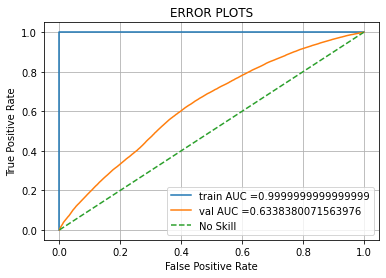

In [21]:
ns_probs = [0 for _ in range(len(y_cv))]
ns_auc = roc_auc_score(y_cv, ns_probs)
y_train_pred1 = rf.predict_proba(tr_data) [:,1]
y_test_pred1 = rf.predict_proba(val_data) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_cv, ns_probs)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_test_pred1)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="val AUC ="+str(auc(test_fpr, test_tpr)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<AxesSubplot:>

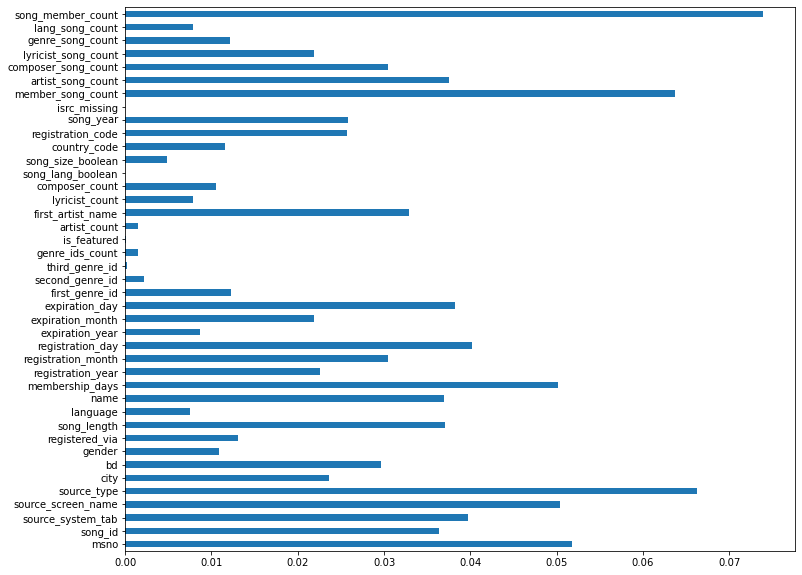

In [22]:
feat_importances = pd.Series(rf.feature_importances_, index=tr_data.columns)
feat_importances.plot(kind='barh',figsize=(12, 10))

1. we can see the train auc is very high whereas the test auc is very low it means our model is overfitting the data
2. the feature engineered data is adding some value to the algorithm

# Decision Tree

In [23]:
start = time.time()
parameters = {'max_depth':[3, 5, 8, 10, 15, 50],'min_samples_split':[5, 10, 100, 500, 1000],'max_leaf_nodes': list(range(2, 100))}
clf = DecisionTreeClassifier(random_state=23, class_weight='balanced' )
model = GridSearchCV(clf, parameters, scoring = 'roc_auc', n_jobs=-1, verbose=2, cv=3)
model.fit(tr_data, y_train)
print(model.best_estimator_)
print('train AUC = ',model.score(tr_data, y_train))
print('val AUC = ',model.score(val_data, y_cv))
print('Time taken for hyper parameter tuning is : ', (time.time() -  start))

Fitting 3 folds for each of 2940 candidates, totalling 8820 fits
DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=99,
                       min_samples_split=1000, random_state=23)
train AUC =  0.7787488867162712
val AUC =  0.6085105447834136
Time taken for hyper parameter tuning is :  1478.8976678848267


In [24]:
dt = DecisionTreeClassifier(class_weight='balanced',max_depth=10,max_leaf_nodes=99, min_samples_split=1000,random_state=23)
dt.fit(tr_data, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=99,
                       min_samples_split=1000, random_state=23)

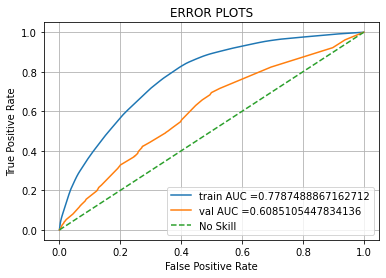

In [25]:
ns_probs = [0 for _ in range(len(y_cv))]
ns_auc = roc_auc_score(y_cv, ns_probs)
y_train_pred1 = dt.predict_proba(tr_data) [:,1]
y_test_pred1 = dt.predict_proba(val_data) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_cv, ns_probs)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_test_pred1)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="val AUC ="+str(auc(test_fpr, test_tpr)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<AxesSubplot:>

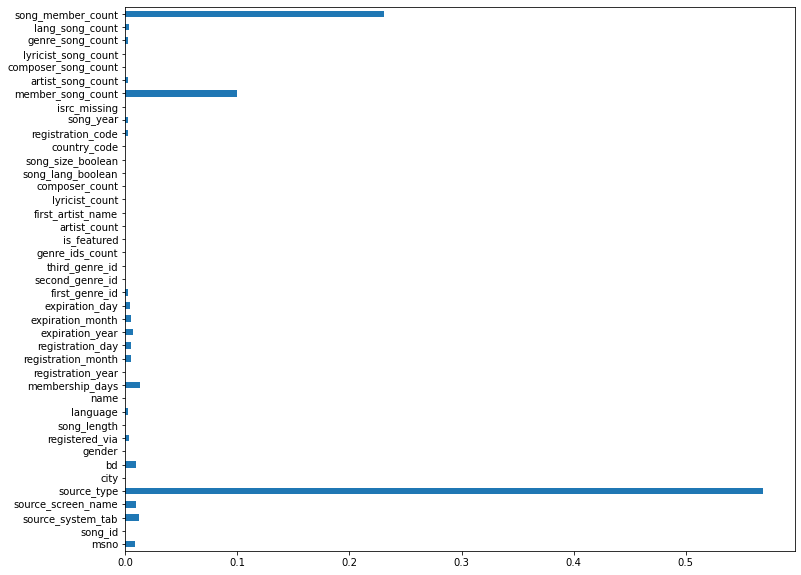

In [26]:
feat_importances = pd.Series(dt.feature_importances_, index=tr_data.columns)
feat_importances.plot(kind='barh',figsize=(12, 10))

1. From the feature importance plot we can say that, source type has maximum importance.
2. Let's take the features with positive importance like source_system_tab, msno,source_type, first_genre_id.
3. Let's try other model using the above mentioned features only.

# GBDT

In [120]:
GBDT =  GradientBoostingClassifier()
parameters = {'max_depth' : [5,10,50], 'n_estimators' : [5,100,500]}
clf = GridSearchCV(GBDT,parameters,scoring = 'roc_auc',verbose=10,return_train_score=True )
gs = clf.fit(tr_data, y_train)
print("Best Params : " , gs.best_params_)
print("Best Score : " , gs.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START max_depth=5, n_estimators=5................................
[CV 1/5; 1/12] END max_depth=5, n_estimators=5;, score=(train=0.666, test=0.658) total time=   2.9s
[CV 2/5; 1/12] START max_depth=5, n_estimators=5................................
[CV 2/5; 1/12] END max_depth=5, n_estimators=5;, score=(train=0.667, test=0.663) total time=   2.8s
[CV 3/5; 1/12] START max_depth=5, n_estimators=5................................
[CV 3/5; 1/12] END max_depth=5, n_estimators=5;, score=(train=0.665, test=0.662) total time=   2.9s
[CV 4/5; 1/12] START max_depth=5, n_estimators=5................................
[CV 4/5; 1/12] END max_depth=5, n_estimators=5;, score=(train=0.665, test=0.661) total time=   3.0s
[CV 5/5; 1/12] START max_depth=5, n_estimators=5................................
[CV 5/5; 1/12] END max_depth=5, n_estimators=5;, score=(train=0.666, test=0.665) total time=   2.9s
[CV 1/5; 2/12] START max_depth=5, 

[CV 5/5; 9/12] END max_depth=50, n_estimators=500;, score=(train=1.000, test=0.609) total time=15.6min
[CV 1/5; 10/12] START max_depth=100, n_estimators=5.............................
[CV 1/5; 10/12] END max_depth=100, n_estimators=5;, score=(train=1.000, test=0.576) total time=  26.1s
[CV 2/5; 10/12] START max_depth=100, n_estimators=5.............................
[CV 2/5; 10/12] END max_depth=100, n_estimators=5;, score=(train=1.000, test=0.575) total time=  26.0s
[CV 3/5; 10/12] START max_depth=100, n_estimators=5.............................
[CV 3/5; 10/12] END max_depth=100, n_estimators=5;, score=(train=1.000, test=0.573) total time=  26.2s
[CV 4/5; 10/12] START max_depth=100, n_estimators=5.............................
[CV 4/5; 10/12] END max_depth=100, n_estimators=5;, score=(train=1.000, test=0.576) total time=  26.1s
[CV 5/5; 10/12] START max_depth=100, n_estimators=5.............................
[CV 5/5; 10/12] END max_depth=100, n_estimators=5;, score=(train=1.000, test=0.5

In [27]:
GBDT= GradientBoostingClassifier(max_depth=10,n_estimators=500)
res1 = GBDT.fit(tr_data, y_train)

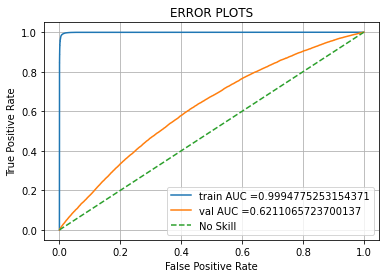

In [28]:
ns_probs = [0 for _ in range(len(y_cv))]
ns_auc = roc_auc_score(y_cv, ns_probs)
y_train_pred1 = res1.predict_proba(tr_data) [:,1]
y_test_pred1 = res1.predict_proba(val_data) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_cv, ns_probs)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_test_pred1)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="val AUC ="+str(auc(test_fpr, test_tpr)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<AxesSubplot:>

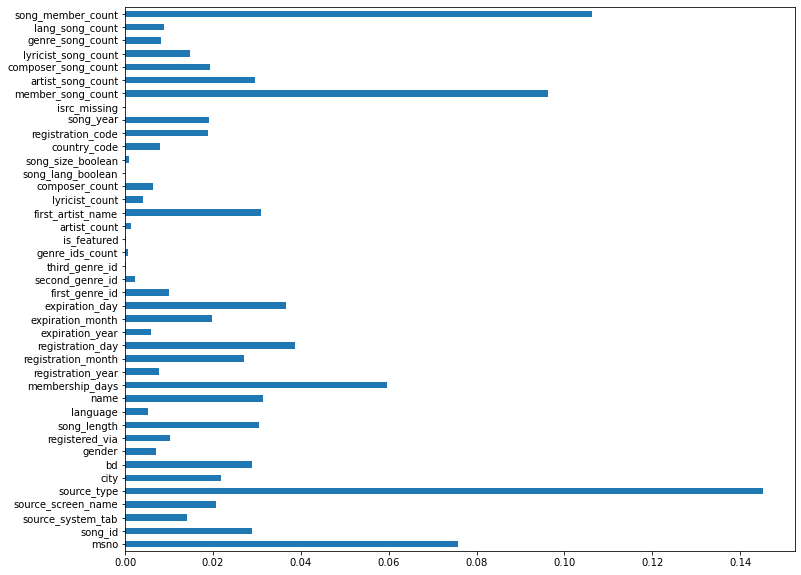

In [29]:
feat_importances = pd.Series(res1.feature_importances_, index=tr_data.columns)
feat_importances.plot(kind='barh',figsize=(12, 10))

1. As we can see from the AUC score the model is overfitting the data 
2. The Feature engineered values adds some importance to the model 


# AdaBoost classifier

In [39]:
adb = AdaBoostClassifier()
parameters = {'n_estimators' : [1000,1100,1200,1300]}
clf = GridSearchCV(adb, parameters,scoring = 'roc_auc')
res = clf.fit(tr_data, y_train)
print("Best Params : " , res.best_params_)
print("Best Score : " , res.best_score_)

Best Params :  {'n_estimators': 1300}
Best Score :  0.7669457017840001


In [40]:
adb = AdaBoostClassifier(n_estimators=1300)
res2 = adb.fit(tr_data, y_train)

In [41]:
file = open('adb.pkl', 'wb')

In [42]:
with open('adb.pkl', 'wb') as file:
    pickle.dump(adb, file)

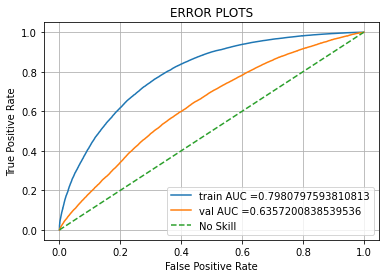

In [43]:
ns_probs = [0 for _ in range(len(y_cv))]
ns_auc = roc_auc_score(y_cv, ns_probs)
y_train_pred1 = adb.predict_proba(tr_data) [:,1]
y_test_pred1 = adb.predict_proba(val_data) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_cv, ns_probs)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_test_pred1)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="val AUC ="+str(auc(test_fpr, test_tpr)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<AxesSubplot:>

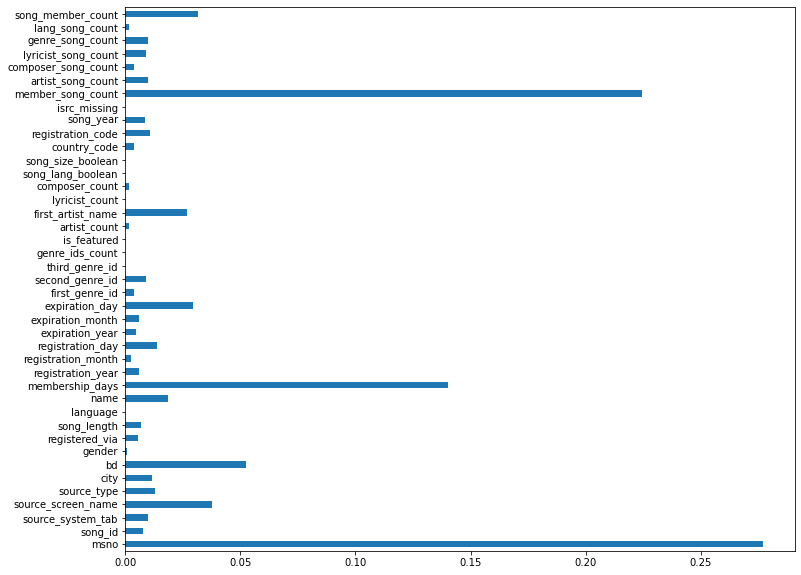

In [44]:
feat_importances = pd.Series(res2.feature_importances_, index=tr_data.columns)
feat_importances.plot(kind='barh',figsize=(12, 10))

1. Adboost Classifier also tends to show some overfitting.
2. we will add PCA feature to improve the performance more

# PCA  on AdaBoost

In [34]:
pca=PCA(n_components=2)

In [35]:
train_pca=pca.fit_transform(tr_data)

In [36]:
cv_pca=pca.transform(val_data)

In [37]:
test_pca=pca.transform(test_data)

In [38]:
for i in range(2):
    tr_data['PCA'+str(i)]=train_pca[:,i]
    val_data['PCA'+str(i)]=cv_pca[:,i]
    test_data['PCA'+str(i)]=test_pca[:,i]

In [39]:
tr_data.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,song_length,...,isrc_missing,member_song_count,artist_song_count,composer_song_count,lyricist_song_count,genre_song_count,lang_song_count,song_member_count,PCA0,PCA1
0,9176,86884,1,7,7,0,-1.116405,1,2,-0.588331,...,0.0,4313,904,531,2528786,84724,1498090,196,2.283399e+06,-531861.009127
1,19273,260594,3,8,4,11,0.430583,0,3,0.591370,...,0.0,581,237384,1335949,2528786,145425,1498090,1,2.433009e+06,-213681.598017
2,19273,140755,3,8,4,11,0.430583,0,3,-0.302516,...,0.0,581,222,3,2528786,145425,1498090,3,2.248861e+06,-483970.963975
3,19273,27577,3,8,4,11,0.430583,0,3,0.152311,...,0.0,581,1,1,2528786,27,243239,1,3.054367e+06,-374929.189615
4,9176,38706,1,7,7,0,-1.116405,1,2,-0.870279,...,0.0,4313,342,342,2528786,27526,1498090,332,2.313627e+06,-577713.072580


In [40]:
adb = AdaBoostClassifier(n_estimators=1000)
res2 = adb.fit(tr_data, y_train)

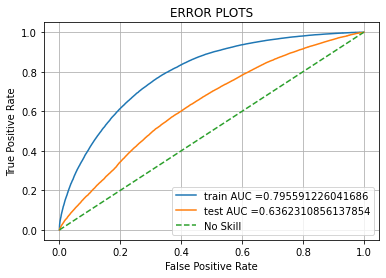

In [41]:
ns_probs = [0 for _ in range(len(y_cv))]
ns_auc = roc_auc_score(y_cv, ns_probs)
y_train_pred1 = adb.predict_proba(tr_data) [:,1]
y_test_pred1 = adb.predict_proba(val_data) [:,1]
ns_fpr, ns_tpr, _ = roc_curve(y_cv, ns_probs)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred1)
test_fpr, test_tpr, te_thresholds = roc_curve(y_cv, y_test_pred1)
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ERROR PLOTS")
plt.grid(True)
plt.show()

<AxesSubplot:>

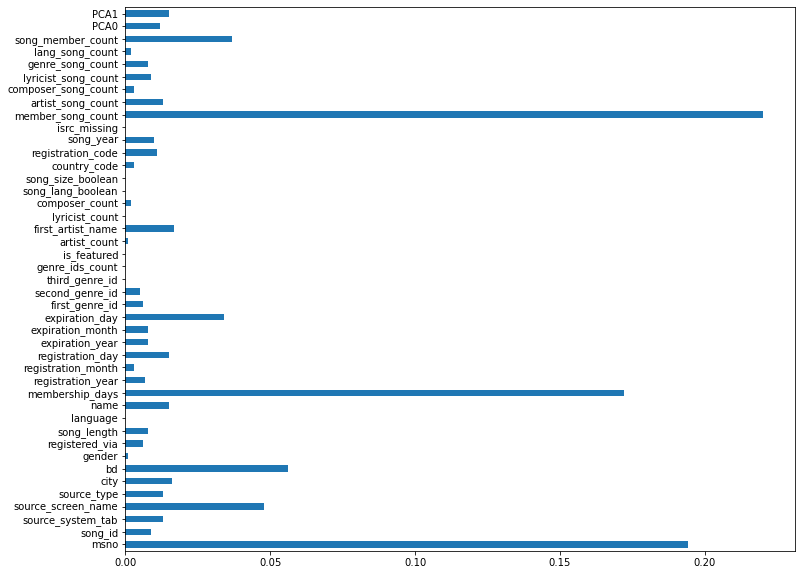

In [42]:
feat_importances = pd.Series(res2.feature_importances_, index=tr_data.columns)
feat_importances.plot(kind='barh',figsize=(12, 10))

1. The added PCA features adds some importance to the model
2. we will try Deep learning model with embedding 

# LightGBM

In [44]:
selection = SelectKBest(f_classif, k=20).fit(tr_data, y_train)
x_tr_2 = selection.transform(tr_data)
x_val_2 = selection.transform(val_data)
x_te_2 = selection.transform(test_data)

In [45]:
#https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/
params = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'boosting': 'gbdt',
        'learning_rate': 0.3 ,
        'verbose': 0,
        'num_leaves': 108,
        'bagging_fraction': 0.95,
        'bagging_freq': 1,
        'bagging_seed': 1,
        'feature_fraction': 0.9,
        'feature_fraction_seed': 1,
        'max_bin': 256,
        'max_depth': 10,
        'num_rounds': 400,
        'metric' : 'auc'
    }

In [46]:
tr_final = lgb.Dataset(x_tr_2, y_train)
val_final = lgb.Dataset(x_val_2, y_cv)

In [47]:
%time model_f1 = lgb.train(params, train_set=tr_final,  valid_sets=val_final, verbose_eval=5)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003214 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[5]	valid_0's auc: 0.628552
[10]	valid_0's auc: 0.632974
[15]	valid_0's auc: 0.630995
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[20]	valid_0's auc: 0.631054
[25]	valid_0's auc: 0.630167
[30]	valid_0's auc: 0.629941
[35]	valid_0's auc: 0.629563
[40]	valid_0's auc: 0.628905
[45]	valid_0's auc: 0.628347
[50]	valid_0's auc: 0.627482
[55]	valid_0's auc: 0.626214
[60]	valid_0's auc: 0.626285
[65]	valid_0's auc: 0.626733
[70]	valid_0's auc: 0.625842
[75]	valid_0's auc: 0.626328
[80]	valid_0's auc: 0.625573
[85]	valid_0's auc: 0.624944
[90]	valid_0's auc: 0.62338
[95]	valid_0's auc: 0.622883
[100]	valid_0's auc: 0.623096
[105]	valid_0's auc: 0.622847
[110]	valid_0's auc: 0.62276
[115]	valid_0's auc: 0.622296
[120]	valid_0's auc: 0.62149

# Applying PCA on LGBM

In [48]:
tr_final = lgb.Dataset(tr_data, y_train)
val_final = lgb.Dataset(val_data, y_cv)

In [49]:
%time model_f1 = lgb.train(params, train_set=tr_final,  valid_sets=val_final, verbose_eval=5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013952 seconds.
You can set `force_col_wise=true` to remove the overhead.
[5]	valid_0's auc: 0.619842
[10]	valid_0's auc: 0.622328
[15]	valid_0's auc: 0.620977
[20]	valid_0's auc: 0.620202
[25]	valid_0's auc: 0.618556
[30]	valid_0's auc: 0.61786
[35]	valid_0's auc: 0.617123
[40]	valid_0's auc: 0.616393
[45]	valid_0's auc: 0.615759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[50]	valid_0's auc: 0.61541
[55]	valid_0's auc: 0.615312
[60]	valid_0's auc: 0.61431
[65]	valid_0's auc: 0.613521
[70]	valid_0's auc: 0.613864
[75]	valid_0's auc: 0.613158
[80]	valid_0's auc: 0.612917
[85]	valid_0's auc: 0.612376
[90]	valid_0's auc: 0.61187
[95]	valid_0's auc: 0.61132
[100]	valid_0's auc: 0.610345
[105]	valid_0's auc: 0.610866
[110]	valid_0's auc: 0.611038
[115]	valid_0's auc: 0.610669
[120]	valid_0's auc: 0.611225
[125]	valid_0's auc: 0.610824
[130]	valid_0's auc: 0.611454
[135]

1. adaboost and LGBM have the highest score.
2. we applied PCA and the score is still lower then adaboost with small margin 

# Deep Learning model With embedding layer

1. We will use only top features for deep learning models
2. we will use top feature important features from adaboost cls

In [23]:
X_train_fe = pd.read_csv('train_fe.csv')
X_val_fe = pd.read_csv('val_fe.csv')
X_test_fe = pd.read_csv('test_fe.csv')

In [24]:
tr_data = X_train_fe[:150000] # 1.5M data points
val_data = X_val_fe[:70000]
test_data = X_test_fe[:80000]
y_train = y_train[:150000]
y_cv = y_cv[:70000]


print('Data size for train data is : ', tr_data.shape, ' and validation data is : ', val_data.shape)

Data size for train data is :  (150000, 36)  and validation data is :  (70000, 36)


In [25]:
tr_data.drop(['first_lyricist', 'first_composer'], axis=1, inplace=True)
val_data.drop(['first_lyricist', 'first_composer'], axis=1, inplace=True)
test_data.drop(['first_lyricist', 'first_composer'], axis=1, inplace=True)

In [26]:
a=X_train_fe['bd'].mean()
def missing(data):
    '''Function to fill missing values'''
    data['first_artist_name'].fillna('no_artist_name', inplace=True)
    data['bd'].fillna(a, inplace=True)
    return data

tr_data = missing(tr_data)
val_data = missing(val_data)
test_data = missing(test_data)

In [27]:
tr_data['language'] = tr_data['language'].apply(lambda x: str(x))
val_data['language'] = val_data['language'].apply(lambda x: str(x))
test_data['language'] = test_data['language'].apply(lambda x: str(x))

In [30]:
from tensorflow import one_hot
from sklearn.preprocessing import LabelEncoder
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [31]:
#cat_features=['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'name','expiration_year', 'first_artist_name','registration_code','song_year', 'language']

In [32]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['song_id'].values) # fit has to happen only on train data
X_train_song_id = vec1.transform(tr_data['song_id'].values)
X_cv_song_id = vec1.transform(val_data ['song_id'].values)
X_test_song_id = vec1.transform(test_data['song_id'].values)

In [33]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['msno'].values) # fit has to happen only on train data
X_train_msno = vec1.transform(tr_data['msno'].values)
X_cv_msno = vec1.transform(val_data ['msno'].values)
X_test_msno = vec1.transform(test_data['msno'].values)

In [34]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['source_system_tab'].values) # fit has to happen only on train data
X_train_source_system_tab = vec1.transform(tr_data['source_system_tab'].values)
X_cv_source_system_tab = vec1.transform(val_data ['source_system_tab'].values)
X_test_source_system_tab = vec1.transform(test_data['source_system_tab'].values)

In [35]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['source_screen_name'].values) # fit has to happen only on train data
X_train_source_screen_name = vec1.transform(tr_data['source_screen_name'].values)
X_cv_source_screen_name = vec1.transform(val_data ['source_screen_name'].values)
X_test_source_screen_name = vec1.transform(test_data['source_screen_name'].values)

In [36]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['source_type'].values) # fit has to happen only on train data
X_train_source_type = vec1.transform(tr_data['source_type'].values)
X_cv_source_type = vec1.transform(val_data ['source_type'].values)
X_test_source_type = vec1.transform(test_data['source_type'].values)

In [37]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['name'].values) # fit has to happen only on train data
X_train_name = vec1.transform(tr_data['name'].values)
X_cv_name = vec1.transform(val_data ['name'].values)
X_test_name = vec1.transform(test_data['name'].values)

In [38]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['expiration_year'].values) # fit has to happen only on train data
X_train_expiration_year = vec1.transform(tr_data['expiration_year'].values)
X_cv_expiration_year = vec1.transform(val_data ['expiration_year'].values)
X_test_expiration_year = vec1.transform(test_data['expiration_year'].values)

In [39]:
le = LabelEncoder()
combined = tr_data['first_artist_name'].append(val_data ['first_artist_name'])
combined = set(combined.append(test_data['first_artist_name']))
combined = np.array(list(combined))
le = le.fit(combined)# fit has to happen only on train data
X_train_first_artist_name = le.transform(tr_data['first_artist_name'].values)
X_cv_first_artist_name = le.transform(val_data ['first_artist_name'].values)
X_test_first_artist_name = le.transform(test_data['first_artist_name'].values)

In [40]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['registration_code'].values) # fit has to happen only on train data
X_train_registration_code = vec1.transform(tr_data['registration_code'].values)
X_cv_registration_code = vec1.transform(val_data ['registration_code'].values)
X_test_registration_code = vec1.transform(test_data['registration_code'].values)

In [41]:
vec1 = LabelEncoderExt()
vec1.fit(tr_data['song_year'].values) # fit has to happen only on train data
X_train_song_year = vec1.transform(tr_data['song_year'].values)
X_cv_song_year = vec1.transform(val_data ['song_year'].values)
X_test_song_year = vec1.transform(test_data['song_year'].values)

In [42]:
le = LabelEncoder()
combined = tr_data['language'].append(val_data ['language'])
combined = set(combined.append(test_data['language']))
combined = np.array(list(combined))
le = le.fit(combined)# fit has to happen only on train data
X_train_language = le.transform(tr_data['language'].values)
X_cv_language = le.transform(val_data ['language'].values)
X_test_language = le.transform(test_data['language'].values)

In [43]:
import tensorflow as tf
from sklearn.metrics import f1_score, roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint
import datetime

class AUC_Callback(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.auc_scores = []
        self.history={'val_auc': [],'auc': []}
    
    def on_epoch_end(self, epoch, logs={}):
        # AUC Scores  
        val_auc = logs["val_auc"]
        if val_auc > 0.80:
            self.model.stop_training = True

AUC = AUC_Callback()

In [44]:
from sklearn.metrics import roc_auc_score

def auc( y_true, y_pred ) :
    return tf.py_function(roc_auc_score, (y_true, y_pred), tf.float32)

In [45]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(tr_data['composer_count'].values.reshape(-1,1))

composer_tr = normalizer.transform(tr_data['composer_count'].values.reshape(-1,1))
composer_cv = normalizer.transform(val_data['composer_count'].values.reshape(-1,1))
composer_test = normalizer.transform(test_data['composer_count'].values.reshape(-1,1))

In [46]:
lyricist_count_tr = normalizer.fit_transform(tr_data['lyricist_count'].values.reshape(-1,1))
lyricist_count_cv = normalizer.transform(val_data['lyricist_count'].values.reshape(-1,1))
lyricist_count_test = normalizer.transform(test_data['lyricist_count'].values.reshape(-1,1))

In [47]:
membership_days_tr = normalizer.fit_transform(tr_data['membership_days'].values.reshape(-1,1))
membership_days_cv = normalizer.transform(val_data['membership_days'].values.reshape(-1,1))
membership_days_test = normalizer.transform(test_data['membership_days'].values.reshape(-1,1))

In [48]:
song_length_tr = normalizer.fit_transform(tr_data['song_length'].values.reshape(-1,1))
song_length_cv = normalizer.transform(val_data['song_length'].values.reshape(-1,1))
song_length_test = normalizer.transform(test_data['song_length'].values.reshape(-1,1))

In [49]:
numerical_values_train = np.concatenate([composer_tr,lyricist_count_tr,membership_days_tr,song_length_tr], axis=1)
numerical_values_cv = np.concatenate([composer_cv,lyricist_count_cv,membership_days_cv,song_length_cv], axis=1)
numerical_values_test =np.concatenate([composer_test, lyricist_count_test,membership_days_test,song_length_test], axis=1)

print(numerical_values_train.shape, numerical_values_cv.shape, numerical_values_test.shape)

(150000, 4) (70000, 4) (80000, 4)


In [50]:
from tensorflow.keras.layers import LeakyReLU

In [54]:
cat_vars = ['msno', 'song_id', 'source_system_tab', 'source_screen_name', 'source_type', 'name','expiration_year', 'first_artist_name','registration_code','song_year', 'language']
cat_sizes = {}
cat_embsizes = {}
for cat in cat_vars:
    cat_sizes[cat] = tr_data[cat].nunique()
    cat_embsizes[cat] = min(50, cat_sizes[cat]//2+1)
    
input1 = Input(shape=(1,))
x1 = Embedding(input_dim=cat_sizes['msno']+1, output_dim=cat_embsizes['msno'],trainable=True)(input1)
x1 = Flatten()(x1)

input2 = Input(shape=(1,))
x2 = Embedding(input_dim=cat_sizes['song_id']+1, output_dim=cat_embsizes['song_id'],trainable=True)(input2)
x2 = Flatten()(x2)

input3 = Input(shape=(1,))
x3 = Embedding(input_dim=cat_sizes['source_system_tab']+1, output_dim=cat_embsizes['source_system_tab'],trainable=True)(input3)
x3 = Flatten()(x3)

input4 = Input(shape=(1,))
x4 = Embedding(input_dim=cat_sizes['source_screen_name']+1, output_dim=cat_embsizes['source_screen_name'],trainable=True)(input4)
x4 = Flatten()(x4)

input5 = Input(shape=(1,))
x5 = Embedding(input_dim=cat_sizes['source_type']+1, output_dim=cat_embsizes['source_type'],trainable=True)(input5)
x5 = Flatten()(x5)

input6 = Input(shape=(1,))
x6 = Embedding(input_dim=cat_sizes['name']+1, output_dim=cat_embsizes['name'],trainable=True)(input6)
x6 = Flatten()(x6)

input7 = Input(shape=(1,))
x7 = Embedding(input_dim=cat_sizes['expiration_year']+1, output_dim=cat_embsizes['expiration_year'],trainable=True)(input7)
x7 = Flatten()(x7)

input8 = Input(shape=(1,))
x8 = Embedding(input_dim=cat_sizes['first_artist_name']+1, output_dim=cat_embsizes['first_artist_name'],trainable=True)(input8)
x8 = Flatten()(x8)

input9 = Input(shape=(1,))
x9 = Embedding(input_dim=cat_sizes['registration_code']+1, output_dim=cat_embsizes['registration_code'],trainable=True)(input9)
x9 = Flatten()(x9)

input10 = Input(shape=(1,))
x10 = Embedding(input_dim=cat_sizes['song_year']+1, output_dim=cat_embsizes['song_year'],trainable=True)(input10)
x10 = Flatten()(x10)

input11 = Input(shape=(1,))
x11 = Embedding(input_dim=cat_sizes['language']+1, output_dim=cat_embsizes['language'],trainable=True)(input11)
x11 = Flatten()(x11)

input12 = Input(shape=(4,))
x12 = Dense(32,kernel_initializer=he_normal())(input12)
x12 = LeakyReLU()(x12)

concat = Concatenate(axis=1)([x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12])

preds = Dense(512, activation='relu')(concat)
preds = Dense(256, activation='relu')(preds)
preds = Dense(128, activation='relu')(preds)
x = BatchNormalization()(preds)
preds = Dense(64, activation='relu')(x)
preds = Dense(32, activation='relu')(preds)
output = Dense(1, activation='softmax')(preds)
model = Model(inputs=[input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12],outputs=output)
opt = RMSprop(lr=1e-3)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy',auc])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_37 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_38 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_39 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_40 (InputLayer)           [(None, 1)]          0                                            
______________________________________________________________________________________________

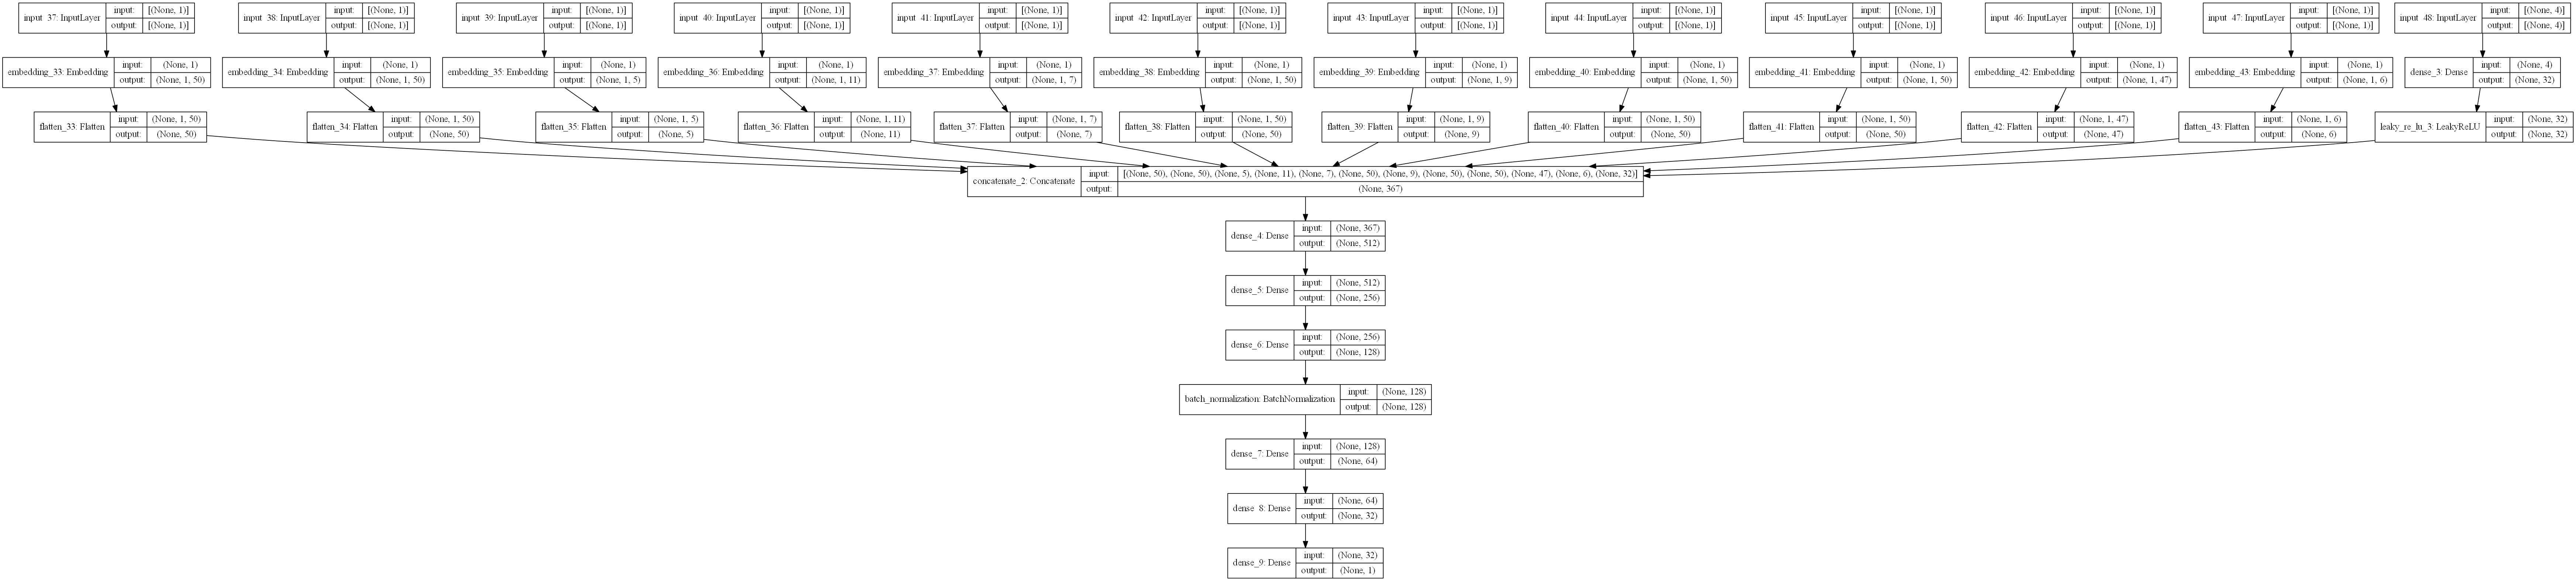

In [55]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, rankdir='TB', dpi=128)

In [56]:
log_dir1 = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir1,histogram_freq=1, write_graph=True)

In [57]:
earlystopping_1 = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

In [58]:
filepath="weights1.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_auc',  verbose=1, save_best_only=True, mode='auto')

In [59]:
callbacks_list = [checkpoint,tensorboard_callback,earlystopping_1,AUC]

In [60]:
model.fit([X_train_msno,X_train_song_id,X_train_source_system_tab,X_train_source_screen_name,X_train_source_type,X_train_name,X_train_expiration_year,X_train_first_artist_name,X_train_registration_code,X_train_song_year,X_train_language,numerical_values_train],y_train, epochs=20, verbose=1, batch_size=256,validation_data=([X_cv_msno,X_cv_song_id,X_cv_source_system_tab,X_cv_source_screen_name,X_cv_source_type,X_cv_name,X_cv_expiration_year,X_cv_first_artist_name,X_cv_registration_code,X_cv_song_year,X_cv_language,numerical_values_cv], y_cv),callbacks = callbacks_list)

Epoch 1/20
586/586 [==============================] - 11s 14ms/step - loss: 0.6431 - accuracy: 0.5030 - auc: 0.5000 - val_loss: 0.6456 - val_accuracy: 0.5030 - val_auc: 0.5000

Epoch 00001: val_auc improved from inf to 0.50000, saving model to weights1.hdf5
Epoch 2/20
586/586 [==============================] - 8s 13ms/step - loss: 0.5726 - accuracy: 0.5030 - auc: 0.5000 - val_loss: 0.6648 - val_accuracy: 0.5030 - val_auc: 0.5000

Epoch 00002: val_auc did not improve from 0.50000
Epoch 3/20
586/586 [==============================] - 8s 13ms/step - loss: 0.5189 - accuracy: 0.5030 - auc: 0.5000 - val_loss: 0.6683 - val_accuracy: 0.5030 - val_auc: 0.5000

Epoch 00003: val_auc did not improve from 0.50000
Epoch 4/20
586/586 [==============================] - 8s 13ms/step - loss: 0.4841 - accuracy: 0.5030 - auc: 0.5000 - val_loss: 0.6885 - val_accuracy: 0.5030 - val_auc: 0.5000

Epoch 00004: val_auc did not improve from 0.50000
Epoch 00004: early stopping


In [61]:
%load_ext tensorboard

In [62]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 20824), started 12:10:35 ago. (Use '!kill 20824' to kill it.)

In [50]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model", "train_auc","val_auc"]

In [51]:
x.add_row(["1. LogisticRegression", 0.57, 0.54])
x.add_row(["2. SVM", 0.5, 0.5])
x.add_row(["3. RF", 0.99, 0.63])
x.add_row(["4. DT", 0.77, 0.60])
x.add_row(["5. GBDT", 0.99, 0.62])
x.add_row(["6. AdaBoost", 0.79, 0.63])
x.add_row(["7. AdaBoost with PCA", 0.79, 0.63])
x.add_row(["8. LightGBM", '-',  0.61])
x.add_row(["9. LightGBM - With PCA", '-', 0.61])
x.add_row(["10. Deep Learning - Embedding", 0.50, 0.50])

In [52]:
print(x)

+-------------------------------+-----------+---------+
|             Model             | train_auc | val_auc |
+-------------------------------+-----------+---------+
|     1. LogisticRegression     |    0.57   |   0.54  |
|             2. SVM            |    0.5    |   0.5   |
|             3. RF             |    0.99   |   0.63  |
|             4. DT             |    0.77   |   0.6   |
|            5. GBDT            |    0.99   |   0.62  |
|          6. AdaBoost          |    0.79   |   0.63  |
|      7. AdaBoost with PCA     |    0.79   |   0.63  |
|          8. LightGBM          |     -     |   0.61  |
|     9. LightGBM - With PCA    |     -     |   0.61  |
| 10. Deep Learning - Embedding |    0.5    |   0.5   |
+-------------------------------+-----------+---------+


# Summary

#EDA

1. We have analyzed all feature from train and validation dataset with the help of different plots like barplot, PDF and CDF.
2. We have also analyzed missing values and their percentages in features.

#FE

1. From songs, songs_extra_info and members we have combined all information related to user and songs and extracted various features.
2. We have extracted features like membership days, information of year, month and day from registration and expiration dates.
3. We have extracted features like song year, country code, registration code from isrc code for each and every song. Along with that we have extracted counts like artist count, genre count, lyricist count, composer count etc.

#Models

1. We have applied various Machine learning algorithms like LR, SVM, DT, RF, GBDT,Adaboost.
2. We have done hyper parameter tuning to get best result.
3. We have also applied Deep learning with embedding.
4. We can see that Adaboost gives better performance compare to other model

#Feature Extraction and Selection

1. We have selected best features based on Adaboost feature importance.
2. we used best feature in our deep learning model and applied embedding on categorical feature
3. We have also tried PCA.
4. We can see that Adaboost and lgbm gives best perforamnce.